In [359]:
# 命名したclusterでプロット後、各サンプルごとに各クラスターを集計する関数
# data=seurat.object(clusterプロット直後)
# types=cluster名(重複可)
cluster_count_function <- function(data,types){ 
    samplename <- c(unique(data[[]]$orig.ident))
    types2 <- unique(types)
    
    data <- AddMetaData(
    object=data,
    metadata=Idents(data),
    col.name='cell_type')
    
    # 入れ物用意
    values <- rep(0,length(samplename))
    names(values) <- samplename
    values <- t(as.data.frame(values))
    
    # countする
    for(i in 1:length(types2)){
    cr <- c()
        for(j in 1:length(samplename)){
            cr <- c(cr,dim(data[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
                %>%select(orig.ident))[1])
        }
    values <- rbind(values,cr)
    }
    rownames(values) <- c('emp',types2)
    cluster_count <- values[-1,]
    return(cluster_count)
    }

In [2]:
getwd()

[1] "/home/tsubosaka/stomach_normal_marker"

In [5]:
all <- readRDS('seurat_object/N-stomach-all.rds')

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


In [7]:
all

An object of class Seurat 
33538 features across 19663 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

In [8]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Welcome to enrichR
Checking connection ... Connection is Live!


In [9]:
library(schex)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:Matrix’:

    which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, M

In [11]:
reticulate::import(module='umap')

Module(umap)

In [12]:
UMAP <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

In [14]:
list.files('seurat_object')

[1] "N-stomach-all.rds"           "N-stomach-B.rds"            
 [3] "N-stomach-endothelium.rds"   "N-stomach-epithelials.rds"  
 [5] "N-stomach-fibro-3d.rds"      "N-stomach-fibro.rds"        
 [7] "N-stomach-immune.rds"        "N-stomach-macrophages.rds"  
 [9] "N-stomach-plasmas_UMAP3.rds" "N-stomach-Ts.rds"

In [42]:
fibro <- readRDS('seurat_object/N-stomach-fibro-3d.rds')

In [15]:
B <- readRDS('seurat_object/N-stomach-B.rds')
T <- readRDS('seurat_object/N-stomach-Ts.rds')

endo <- readRDS('seurat_object//N-stomach-endothelium.rds')
epi <- readRDS('seurat_object//N-stomach-epithelials.rds')
plasmas <- readRDS('seurat_object//N-stomach-plasmas_UMAP3.rds')
macros <- readRDS('seurat_object//N-stomach-macrophages.rds')
immunes <- readRDS('seurat_object//N-stomach-immune.rds')

In [43]:
fibro

An object of class Seurat 
33538 features across 1387 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

In [193]:
remove_samples <- function(data, sample_name){
    Idents(data) <- 'orig.ident'
    data <- subset(data, idents=sample_name,invert=TRUE)
    Idents(data) <- 'seurat_clusters'
    return (data)
}

In [184]:
Idents(all) <- 'orig.ident'

In [186]:
all <- subset(all, idents = '18N-total',invert=TRUE)

In [192]:
Idents(all) <- 'seurat_clusters'

In [188]:
table(all[[]]$orig.ident)


10N-total 11N-total 12N-total 14N-total 15N-total 16N-total 17N-total  6N-total 
     2194      1131      2836       839      1938      2113      3307       851 
 8N-total  9N-total 
     2648      1772 

In [194]:
fibro <- remove_samples(fibro,'18N-total')

In [195]:
table(fibro[[]]$orig.ident)


10N-total 11N-total 12N-total 14N-total 15N-total 16N-total 17N-total  6N-total 
      204       204       111        54       190        86        89       130 
 8N-total  9N-total 
      191       120 

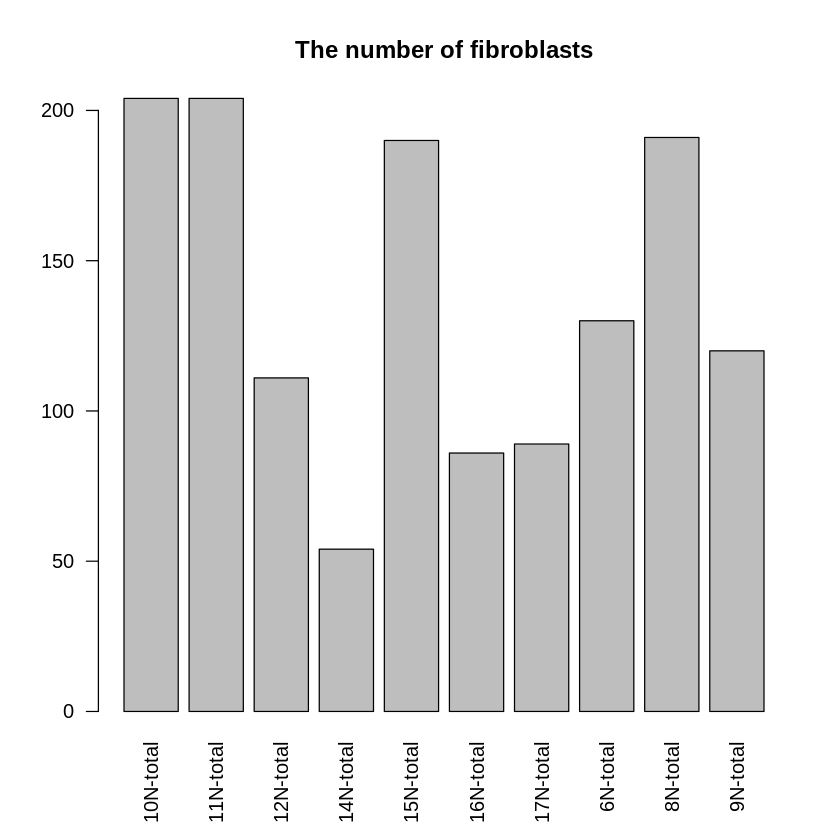

In [196]:
barplot(table(fibro[[]]$orig.ident),las=2,xlab = ' ',main = 'The number of fibroblasts')

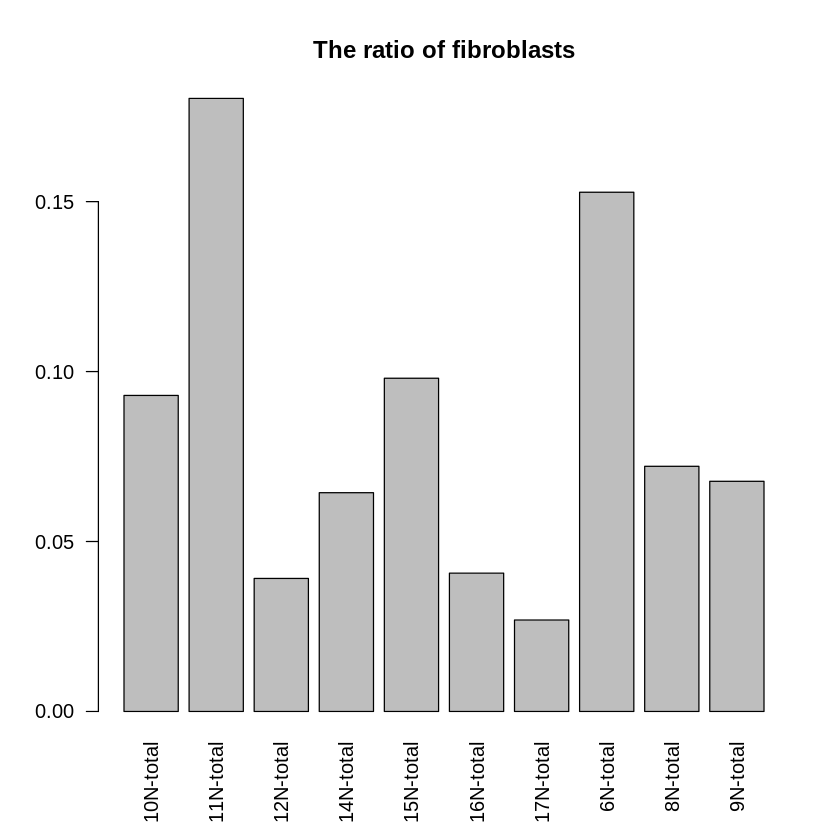

In [198]:
barplot(table(fibro[[]]$orig.ident)/table(all[[]]$orig.ident),las=2,xlab = ' ',main = 'The ratio of fibroblasts')

In [39]:
fibro

An object of class Seurat 
33538 features across 1387 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

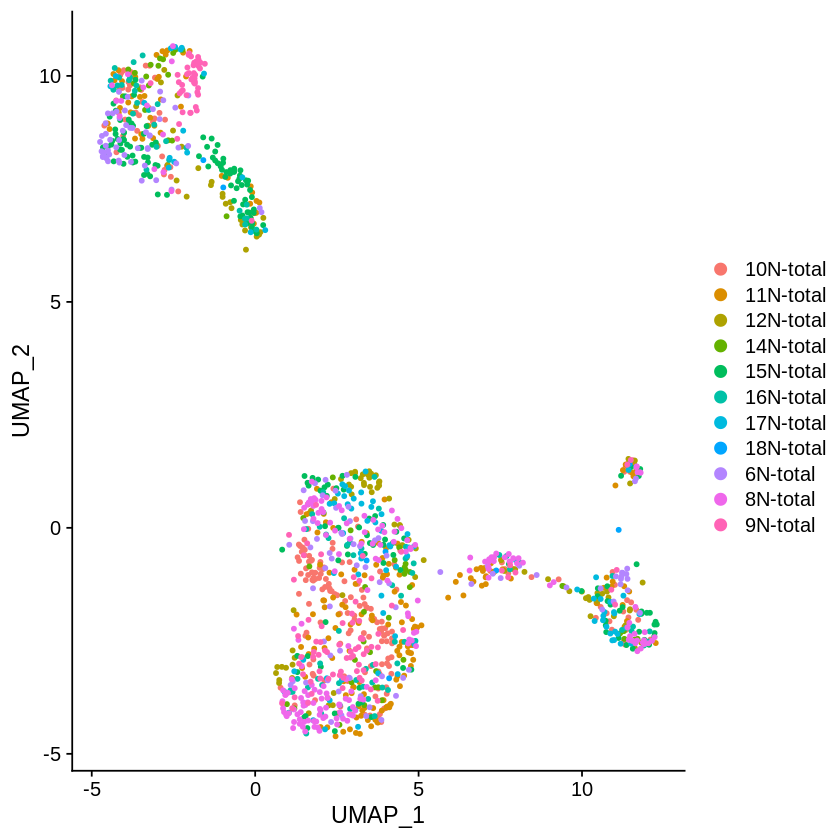

In [115]:
DimPlot(fibro,group.by='orig.ident')

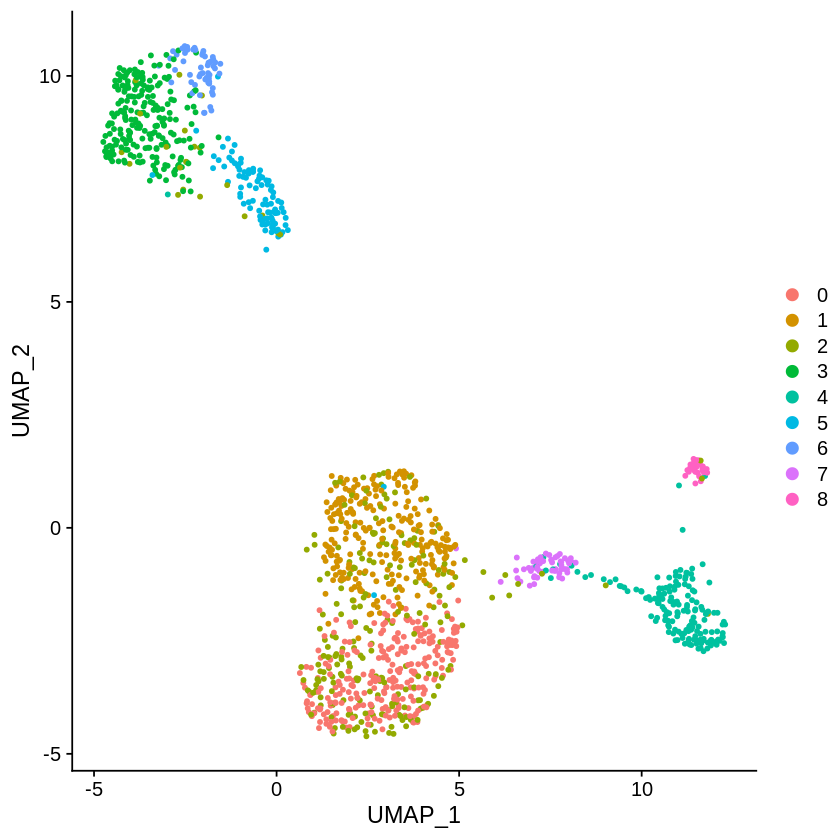

In [44]:
DimPlot(fibro)

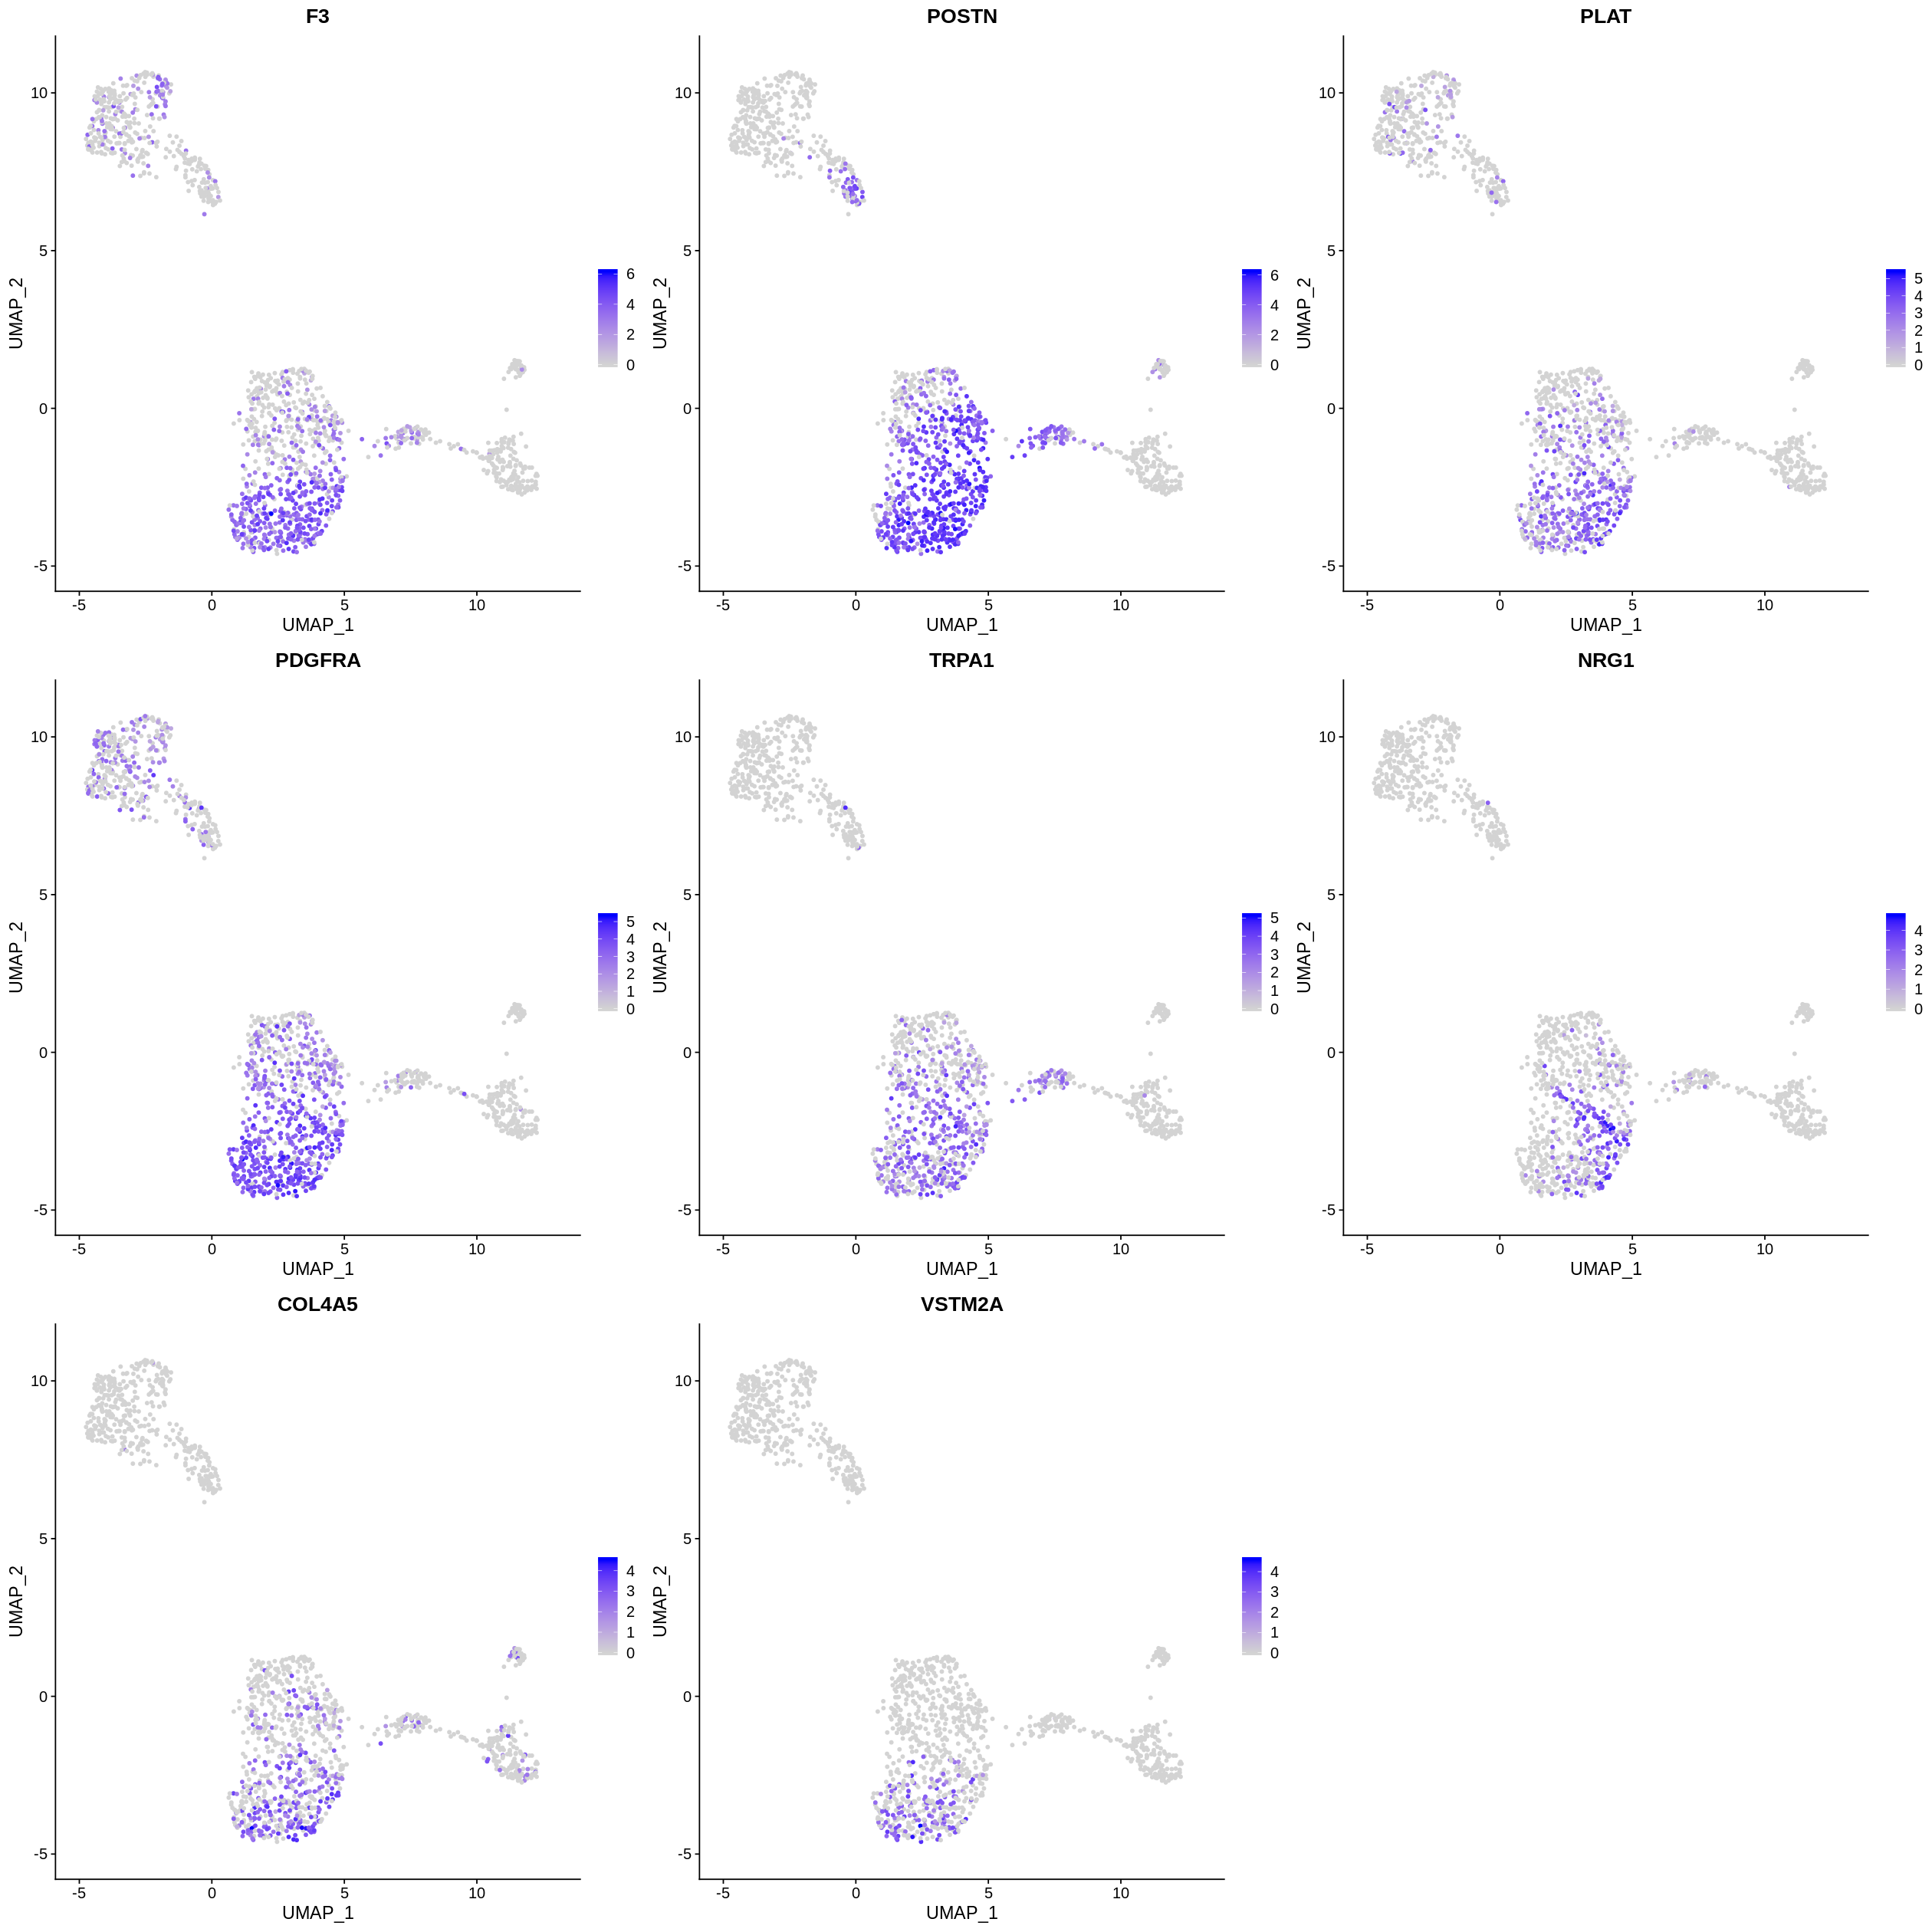

In [45]:
# cluster0
options(repr.plot.width=7*3, repr.plot.height=7*3)
FeaturePlot(fibro,features=c('F3','POSTN','PLAT',
                             'PDGFRA','TRPA1','NRG1',
                             'COL4A5','VSTM2A'),ncol=3)

# options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(fibro,features='HGF')

# options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(fibro,features='PDGFRB')

# options(repr.plot.width=7, repr.plot.height=7)
FeaturePlot(fibro,features='COL13A1')

# options(repr.plot.width=7*3, repr.plot.height=7)
FeaturePlot(fibro,features=c('CXCL14','ITGA8','NPNT'),ncol=3)

# FeaturePlot(fibro,features='COL14A1')

# FeaturePlot(fibro,features='PTGES2')

# FeaturePlot(fibro,features='MMP3')

# FeaturePlot(fibro,features='PRRX1')

# FeaturePlot(fibro,features='LBH')

# FeaturePlot(fibro,features='AEBP1')

# FeaturePlot(fibro,features='COL8A1')

# FeaturePlot(fibro,features='PDGFRA')

# FeaturePlot(fibro,features='POSTN')

In [60]:
marker01 <- FindMarkers(fibro, ident.1 = 0, ident.2=1, only.pos=TRUE)

In [62]:
marker01 %>% head

p_val        avg_logFC pct.1 pct.2 p_val_adj   
F3     3.774051e-61 2.137064  0.919 0.280 1.265741e-56
PDGFRA 1.241426e-43 1.269627  0.950 0.591 4.163495e-39
POSTN  1.171826e-34 1.022077  0.954 0.654 3.930071e-30
PLAT   1.678042e-34 1.494913  0.768 0.284 5.627818e-30
VSTM2A 3.687325e-25 1.807967  0.359 0.004 1.236655e-20
COL4A5 7.621254e-22 1.262708  0.579 0.198 2.556016e-17

In [63]:
marker10 <- FindMarkers(fibro, ident.1 = 1, ident.2=0, only.pos=TRUE)

In [65]:
marker10 %>% head

p_val        avg_logFC pct.1 pct.2 p_val_adj   
LUM    4.698419e-50 1.4217362 0.942 0.413 1.575756e-45
ABCA8  3.486752e-49 1.6655877 0.875 0.236 1.169387e-44
TMSB4X 6.775916e-29 0.7749889 0.938 0.753 2.272507e-24
CFD    1.944277e-28 1.6387174 0.630 0.189 6.520717e-24
ADAM28 6.222890e-28 1.5735208 0.623 0.178 2.087033e-23
DCN    1.323065e-27 0.8532931 0.887 0.660 4.437294e-23

# FeaturePlot(fibro,features='LUM')

In [116]:
marker1 <- c('ABCA8','ADAM28','CCL11','PLPP3','PAPPA','NID1')

In [117]:
marker3 <- c('SFRP2','MGP','SFRP1','CFD','PI16','COL14A1')

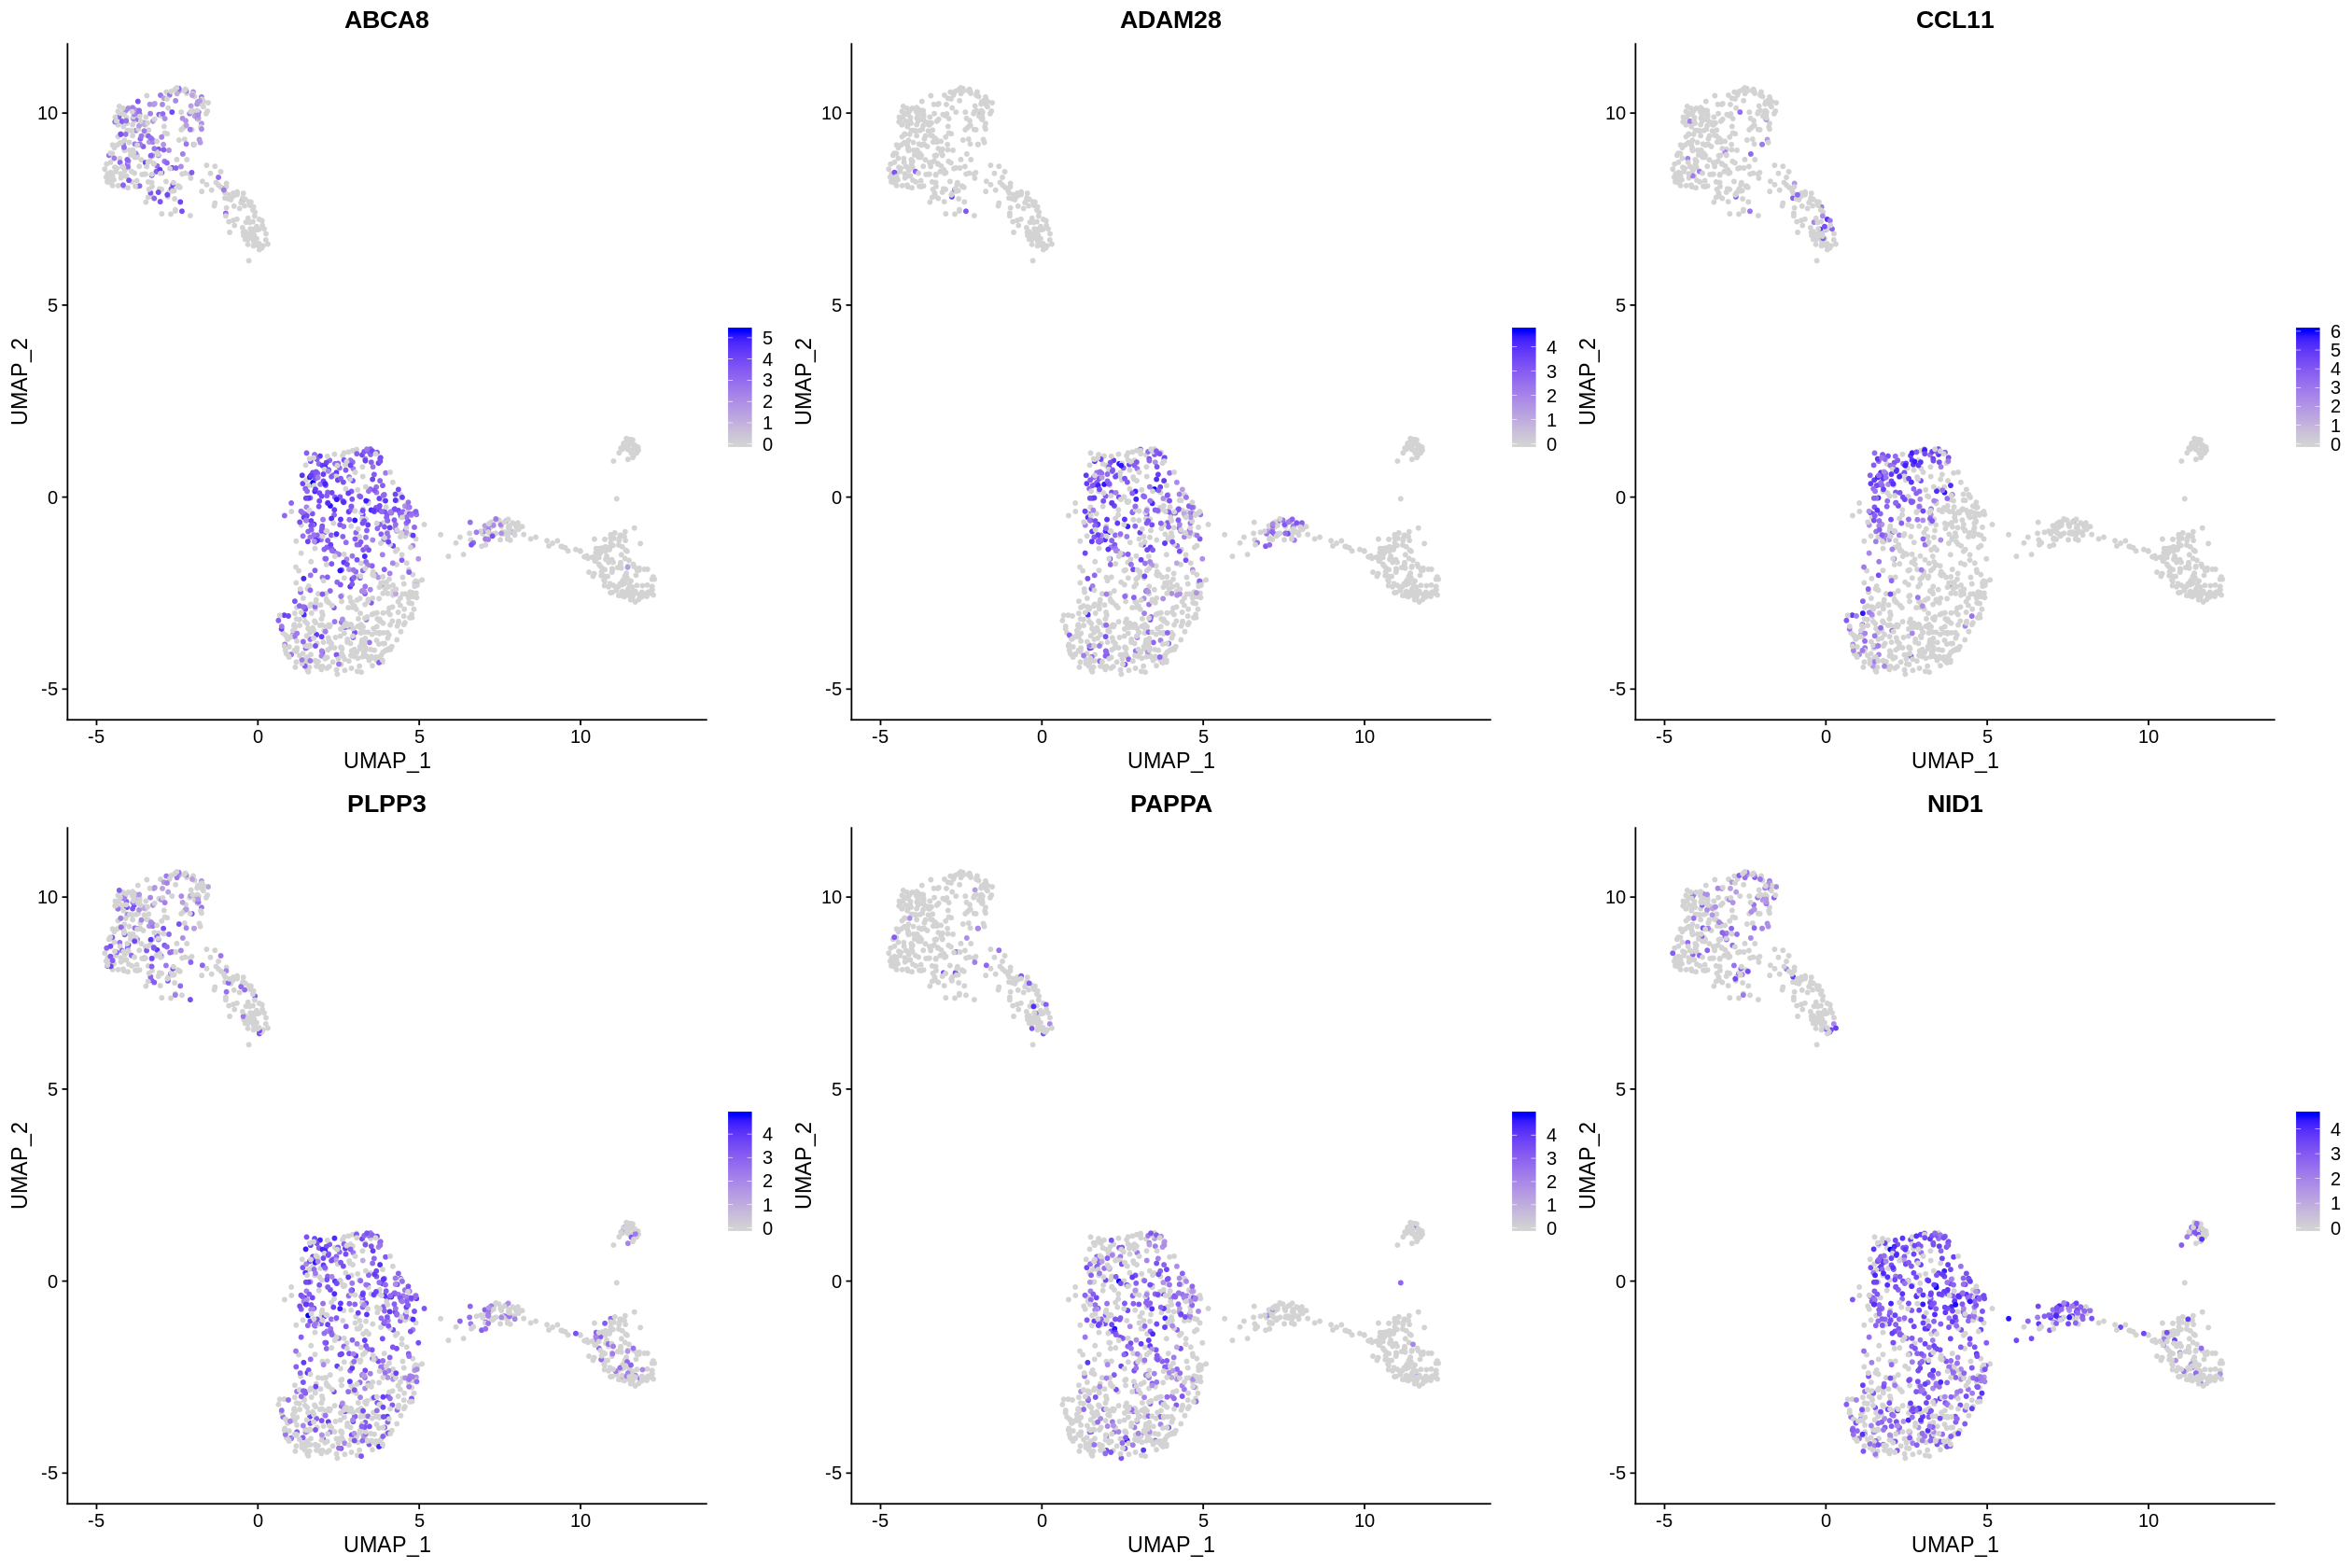

In [119]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker1,ncol=3)

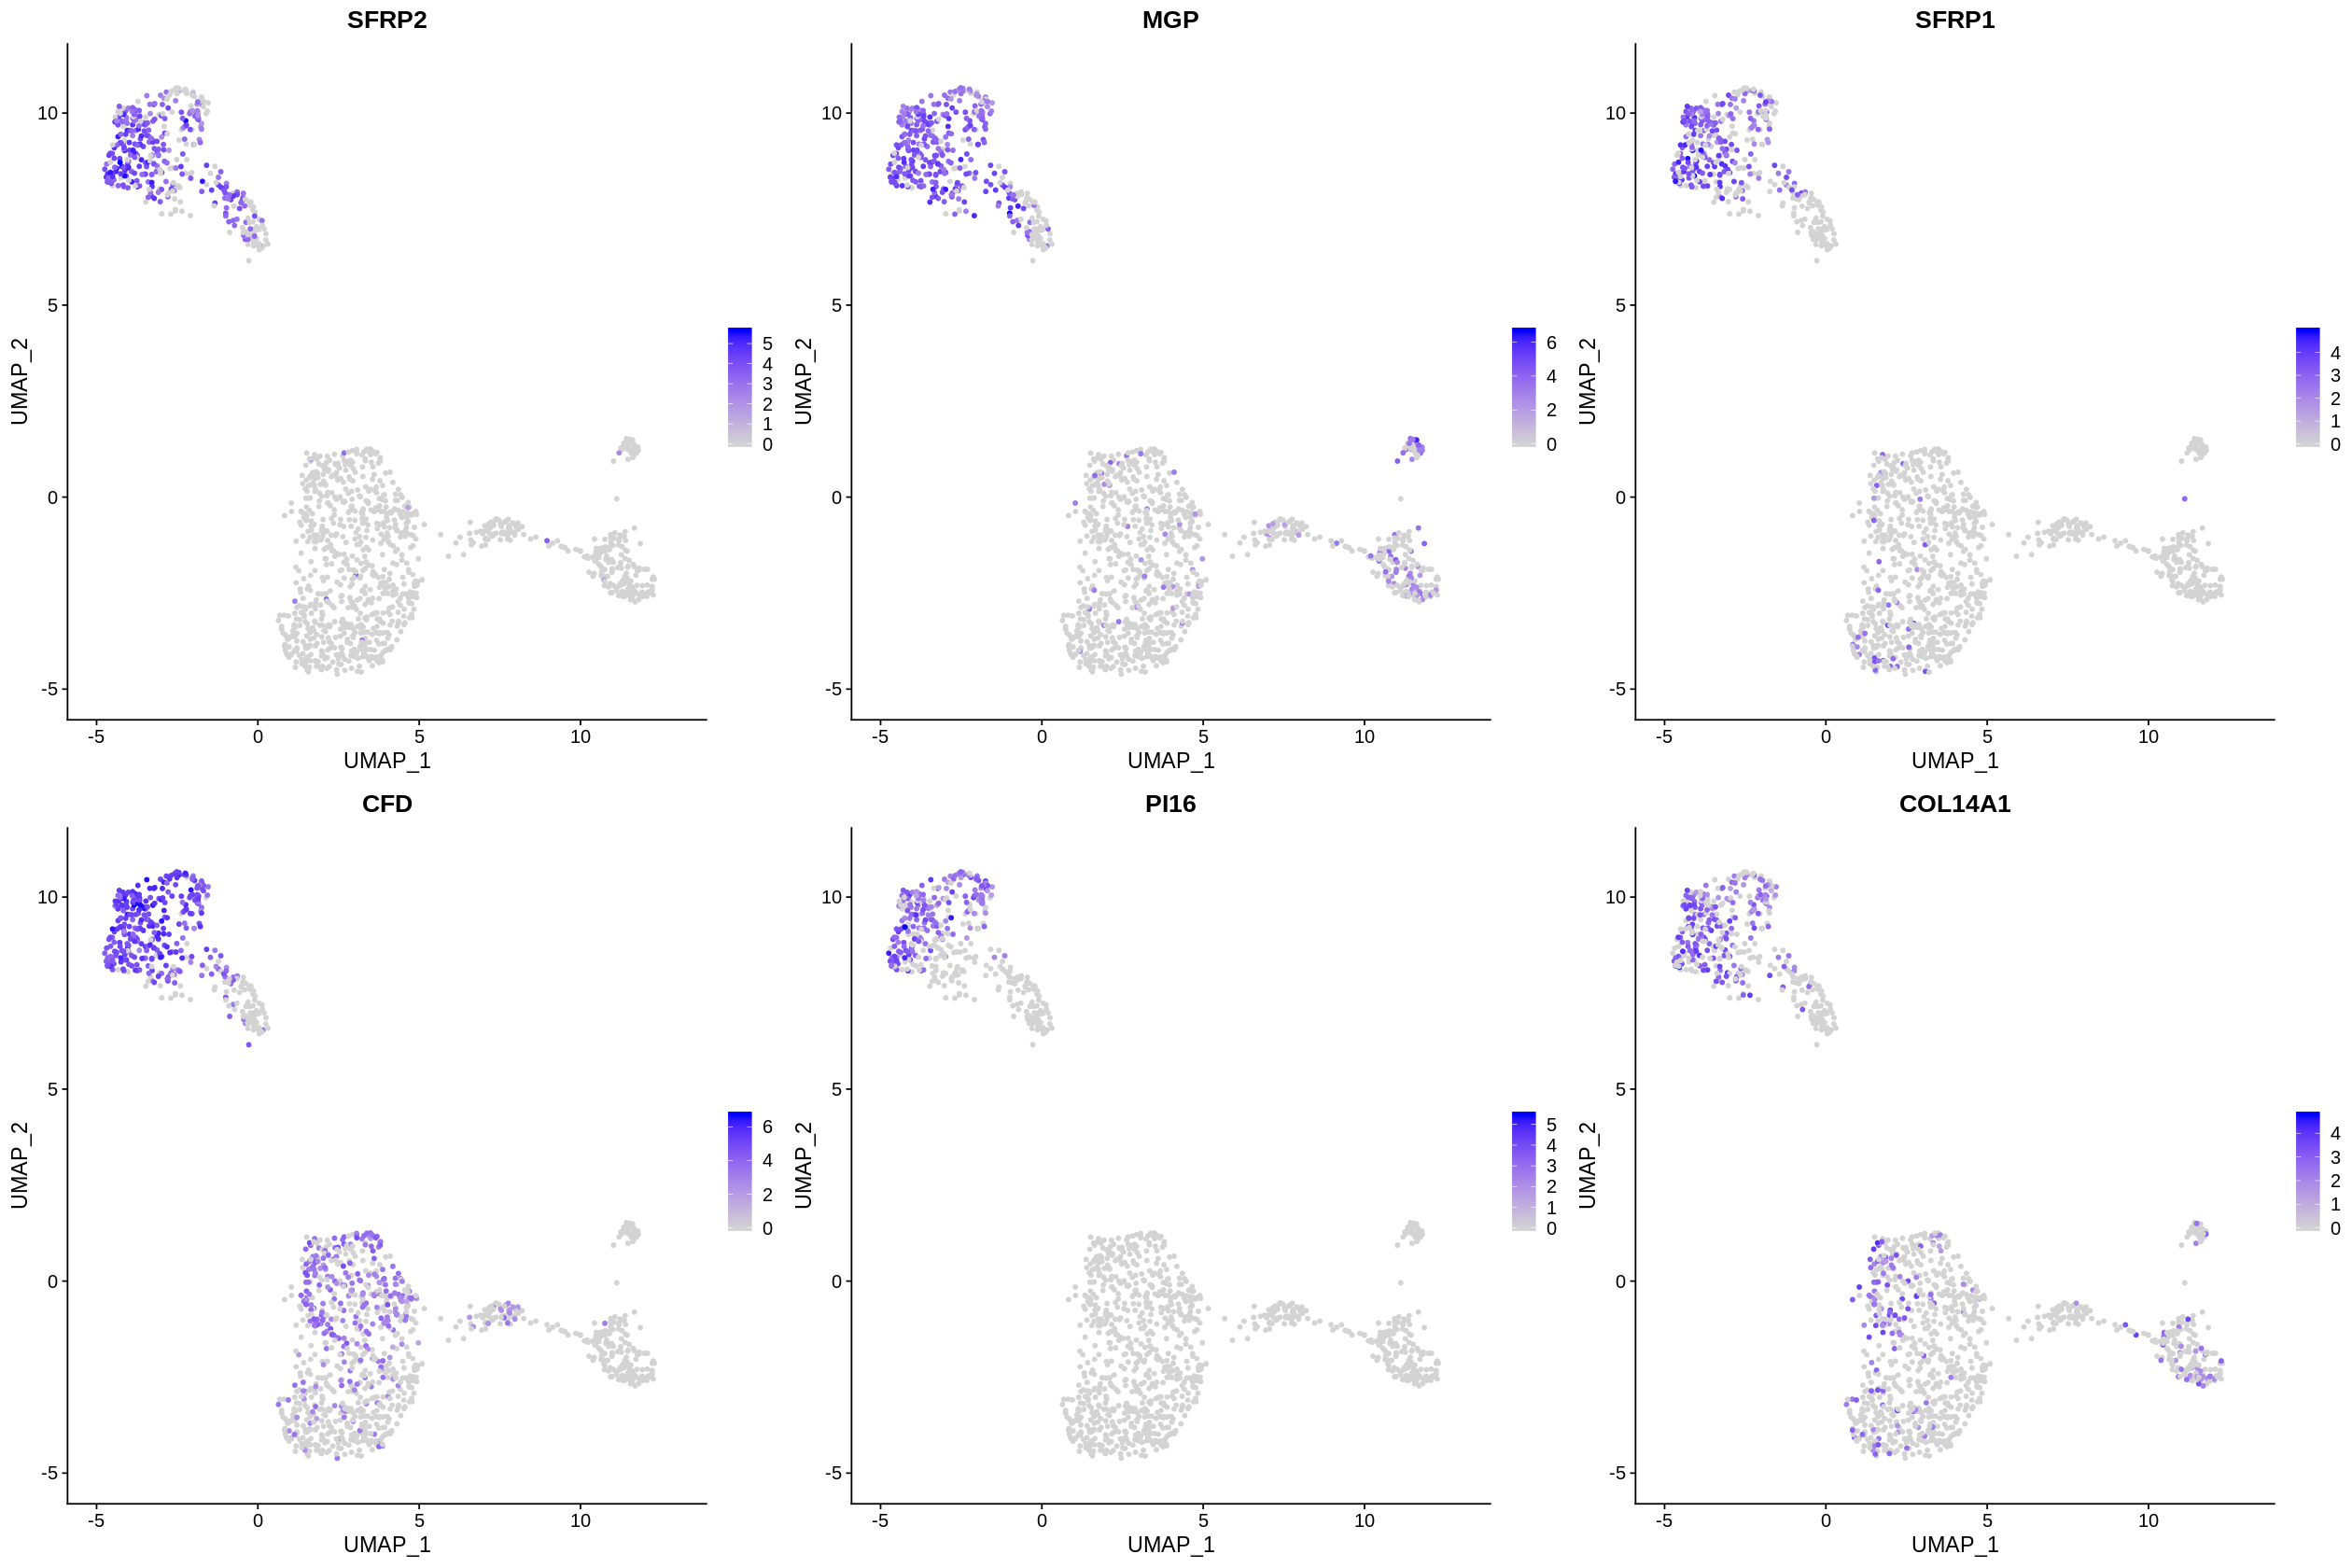

In [118]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker3,ncol=3)

# FeaturePlot(fibro,features='COL14A1')　

In [71]:
marker4 <- c('RERGL','MYH11','SNCG','PLN','SORBS2','TAGLN','ACTA2')
marker5 <- c('CTHRC1', 'SFRP4', 'TIMP1','THBS2','GREM1','LUM')
marker6 <- c('MFAP5','C1QTNF3','PCOLCE2','CLEC3B','CILP','MEDAG')
marker7 <- c('HHIP','HSD17B6','NPNT','SOSTDC1','MYOCD','ACTG2')
marker8 <- c('CD36','ADGRF5','HIGD1B','COX4I2','LPL')

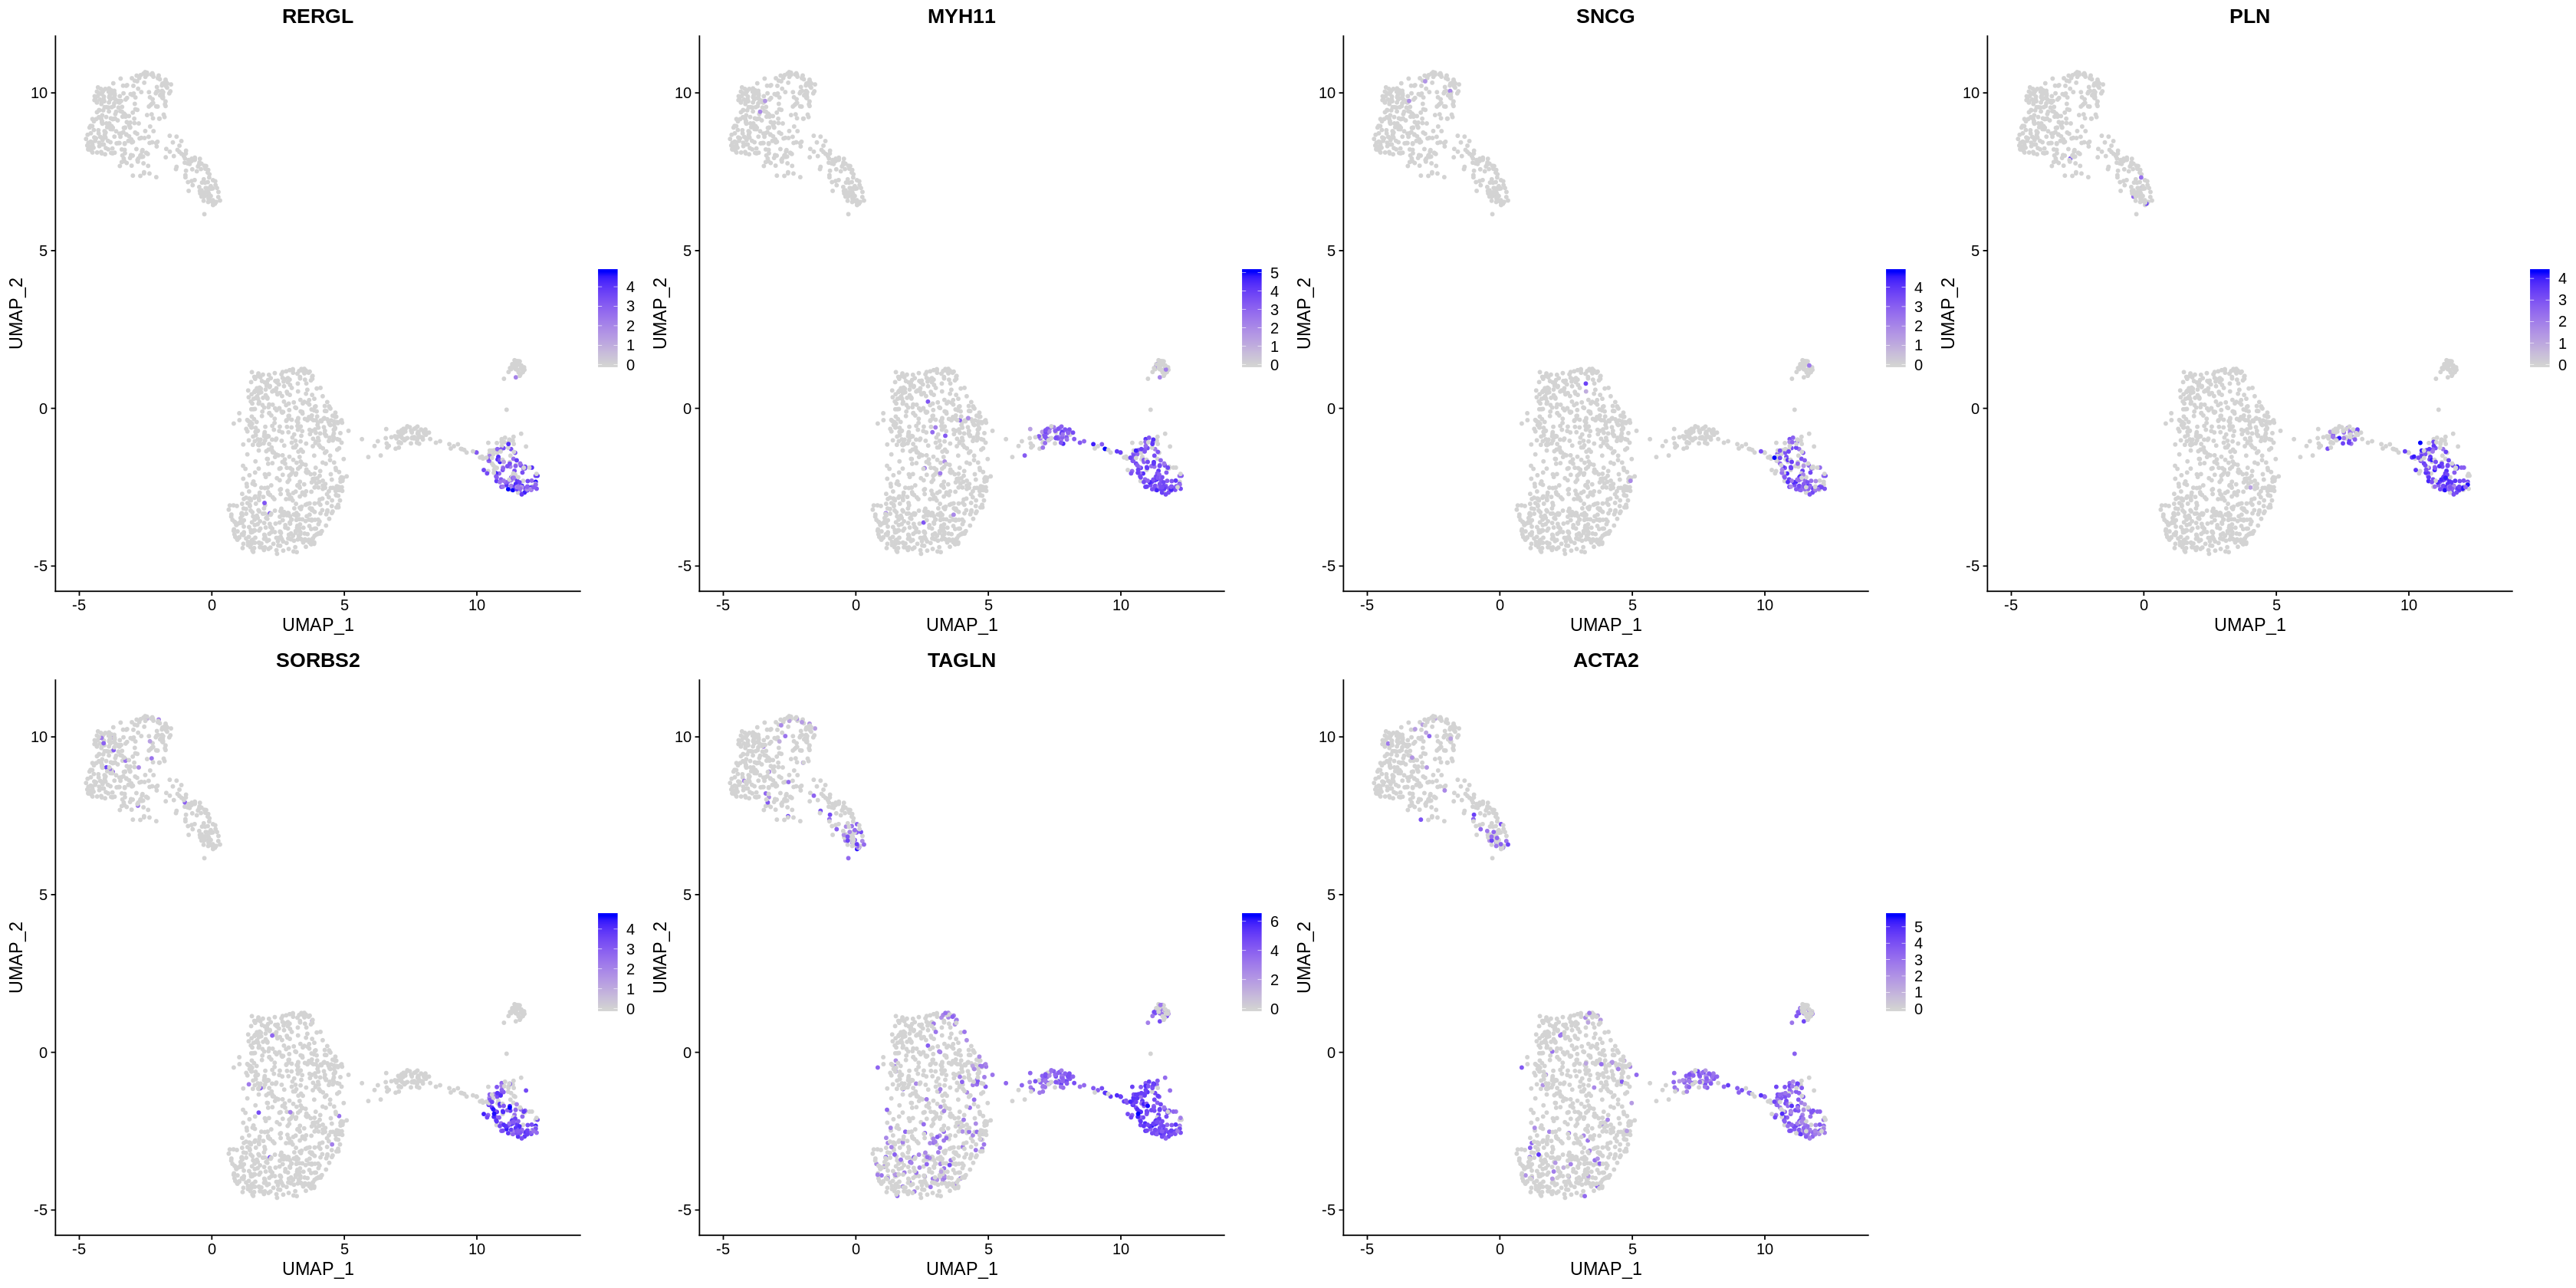

In [77]:
options(repr.plot.width=7*4, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker4,ncol=4)
options(repr.plot.width=7, repr.plot.height=7)

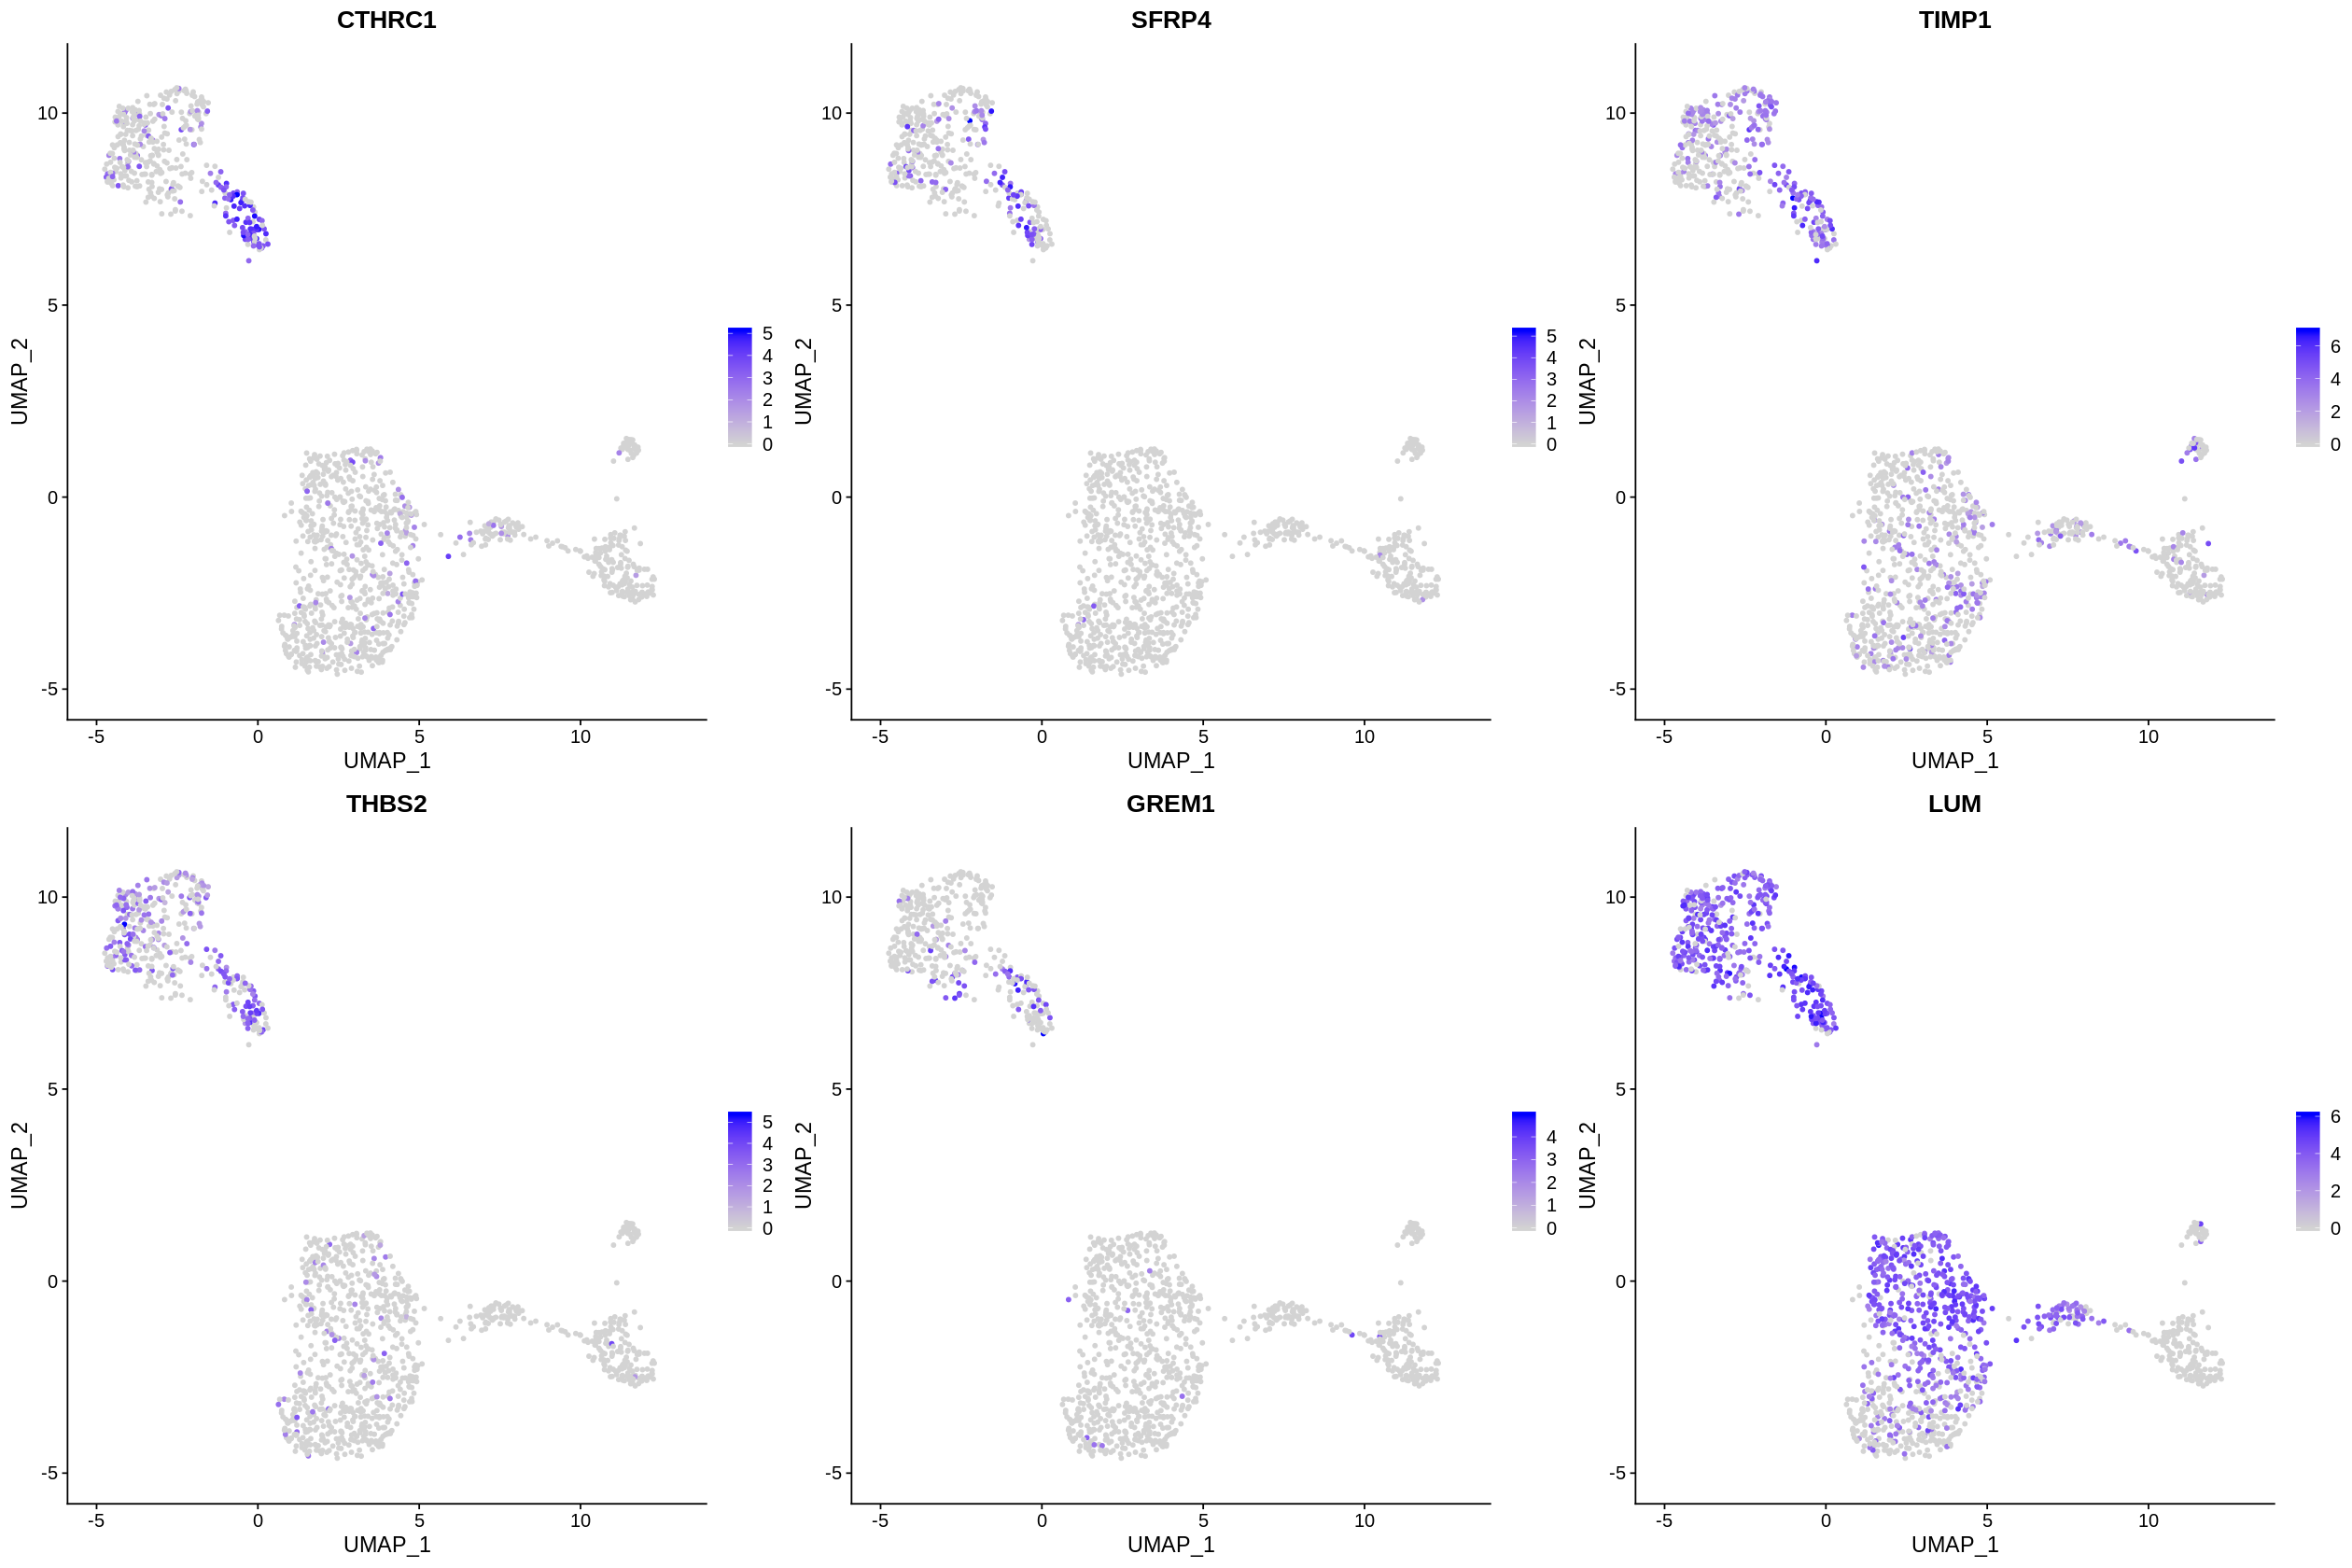

In [79]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker5,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

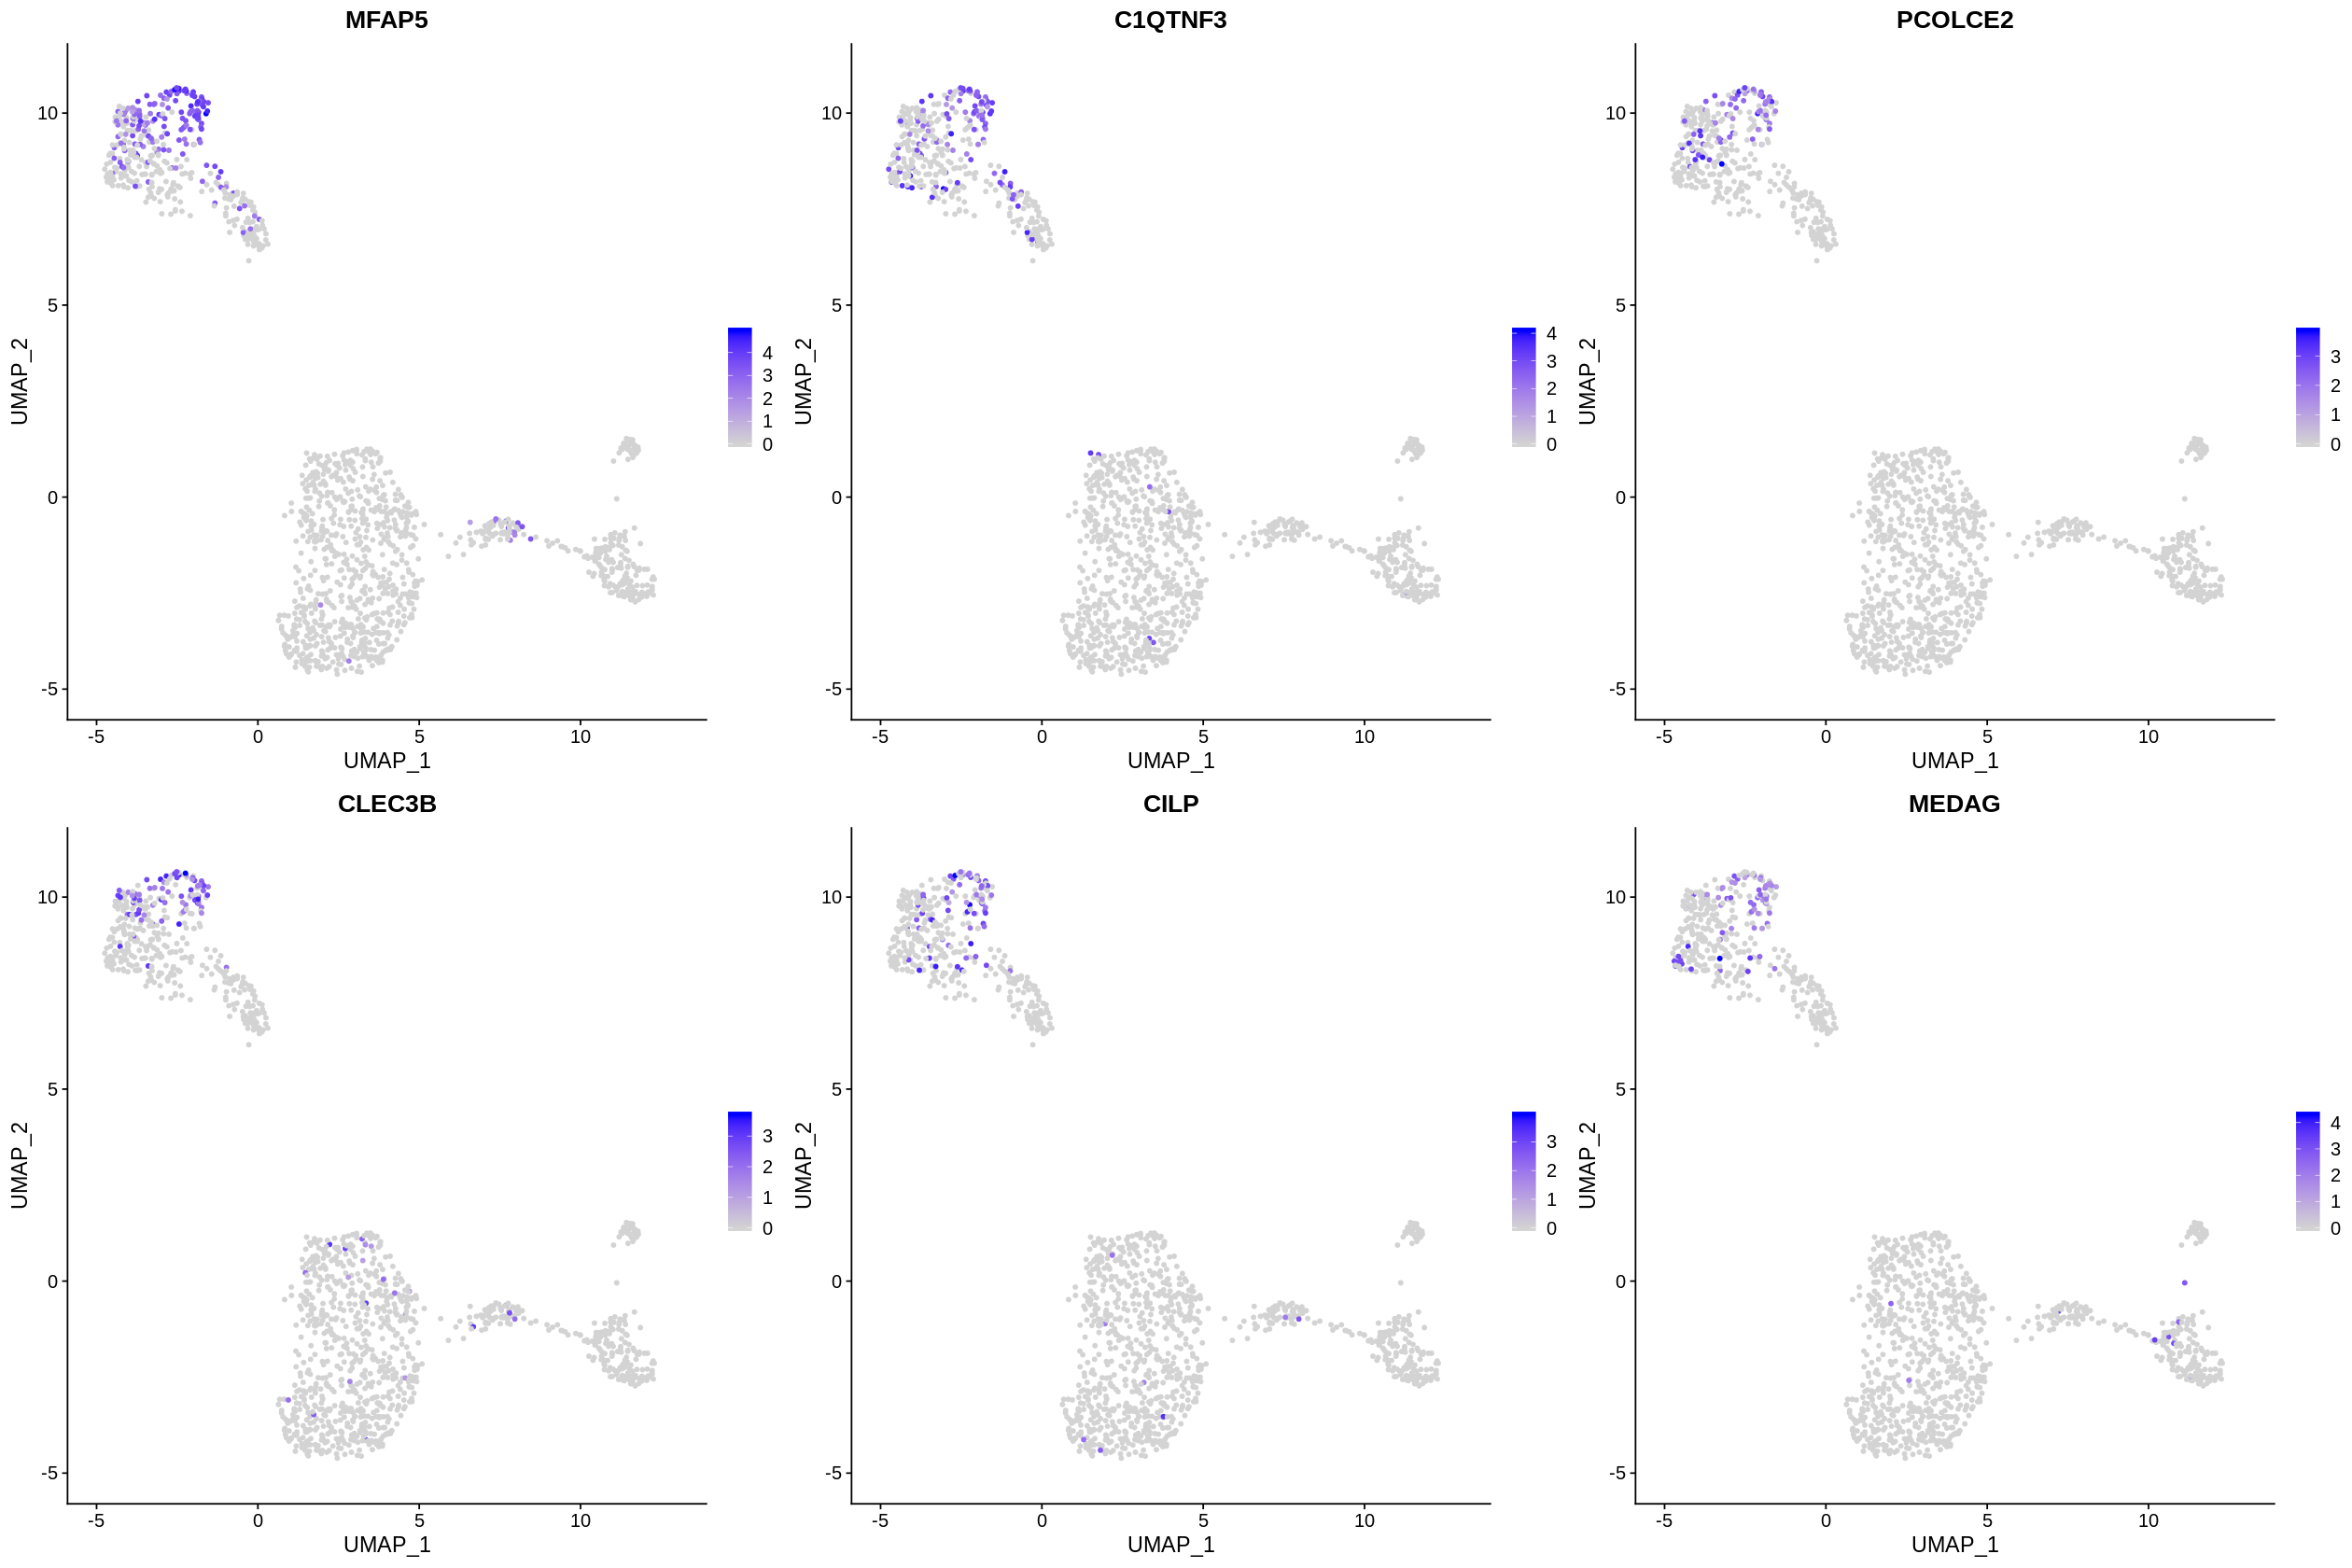

In [80]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker6,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

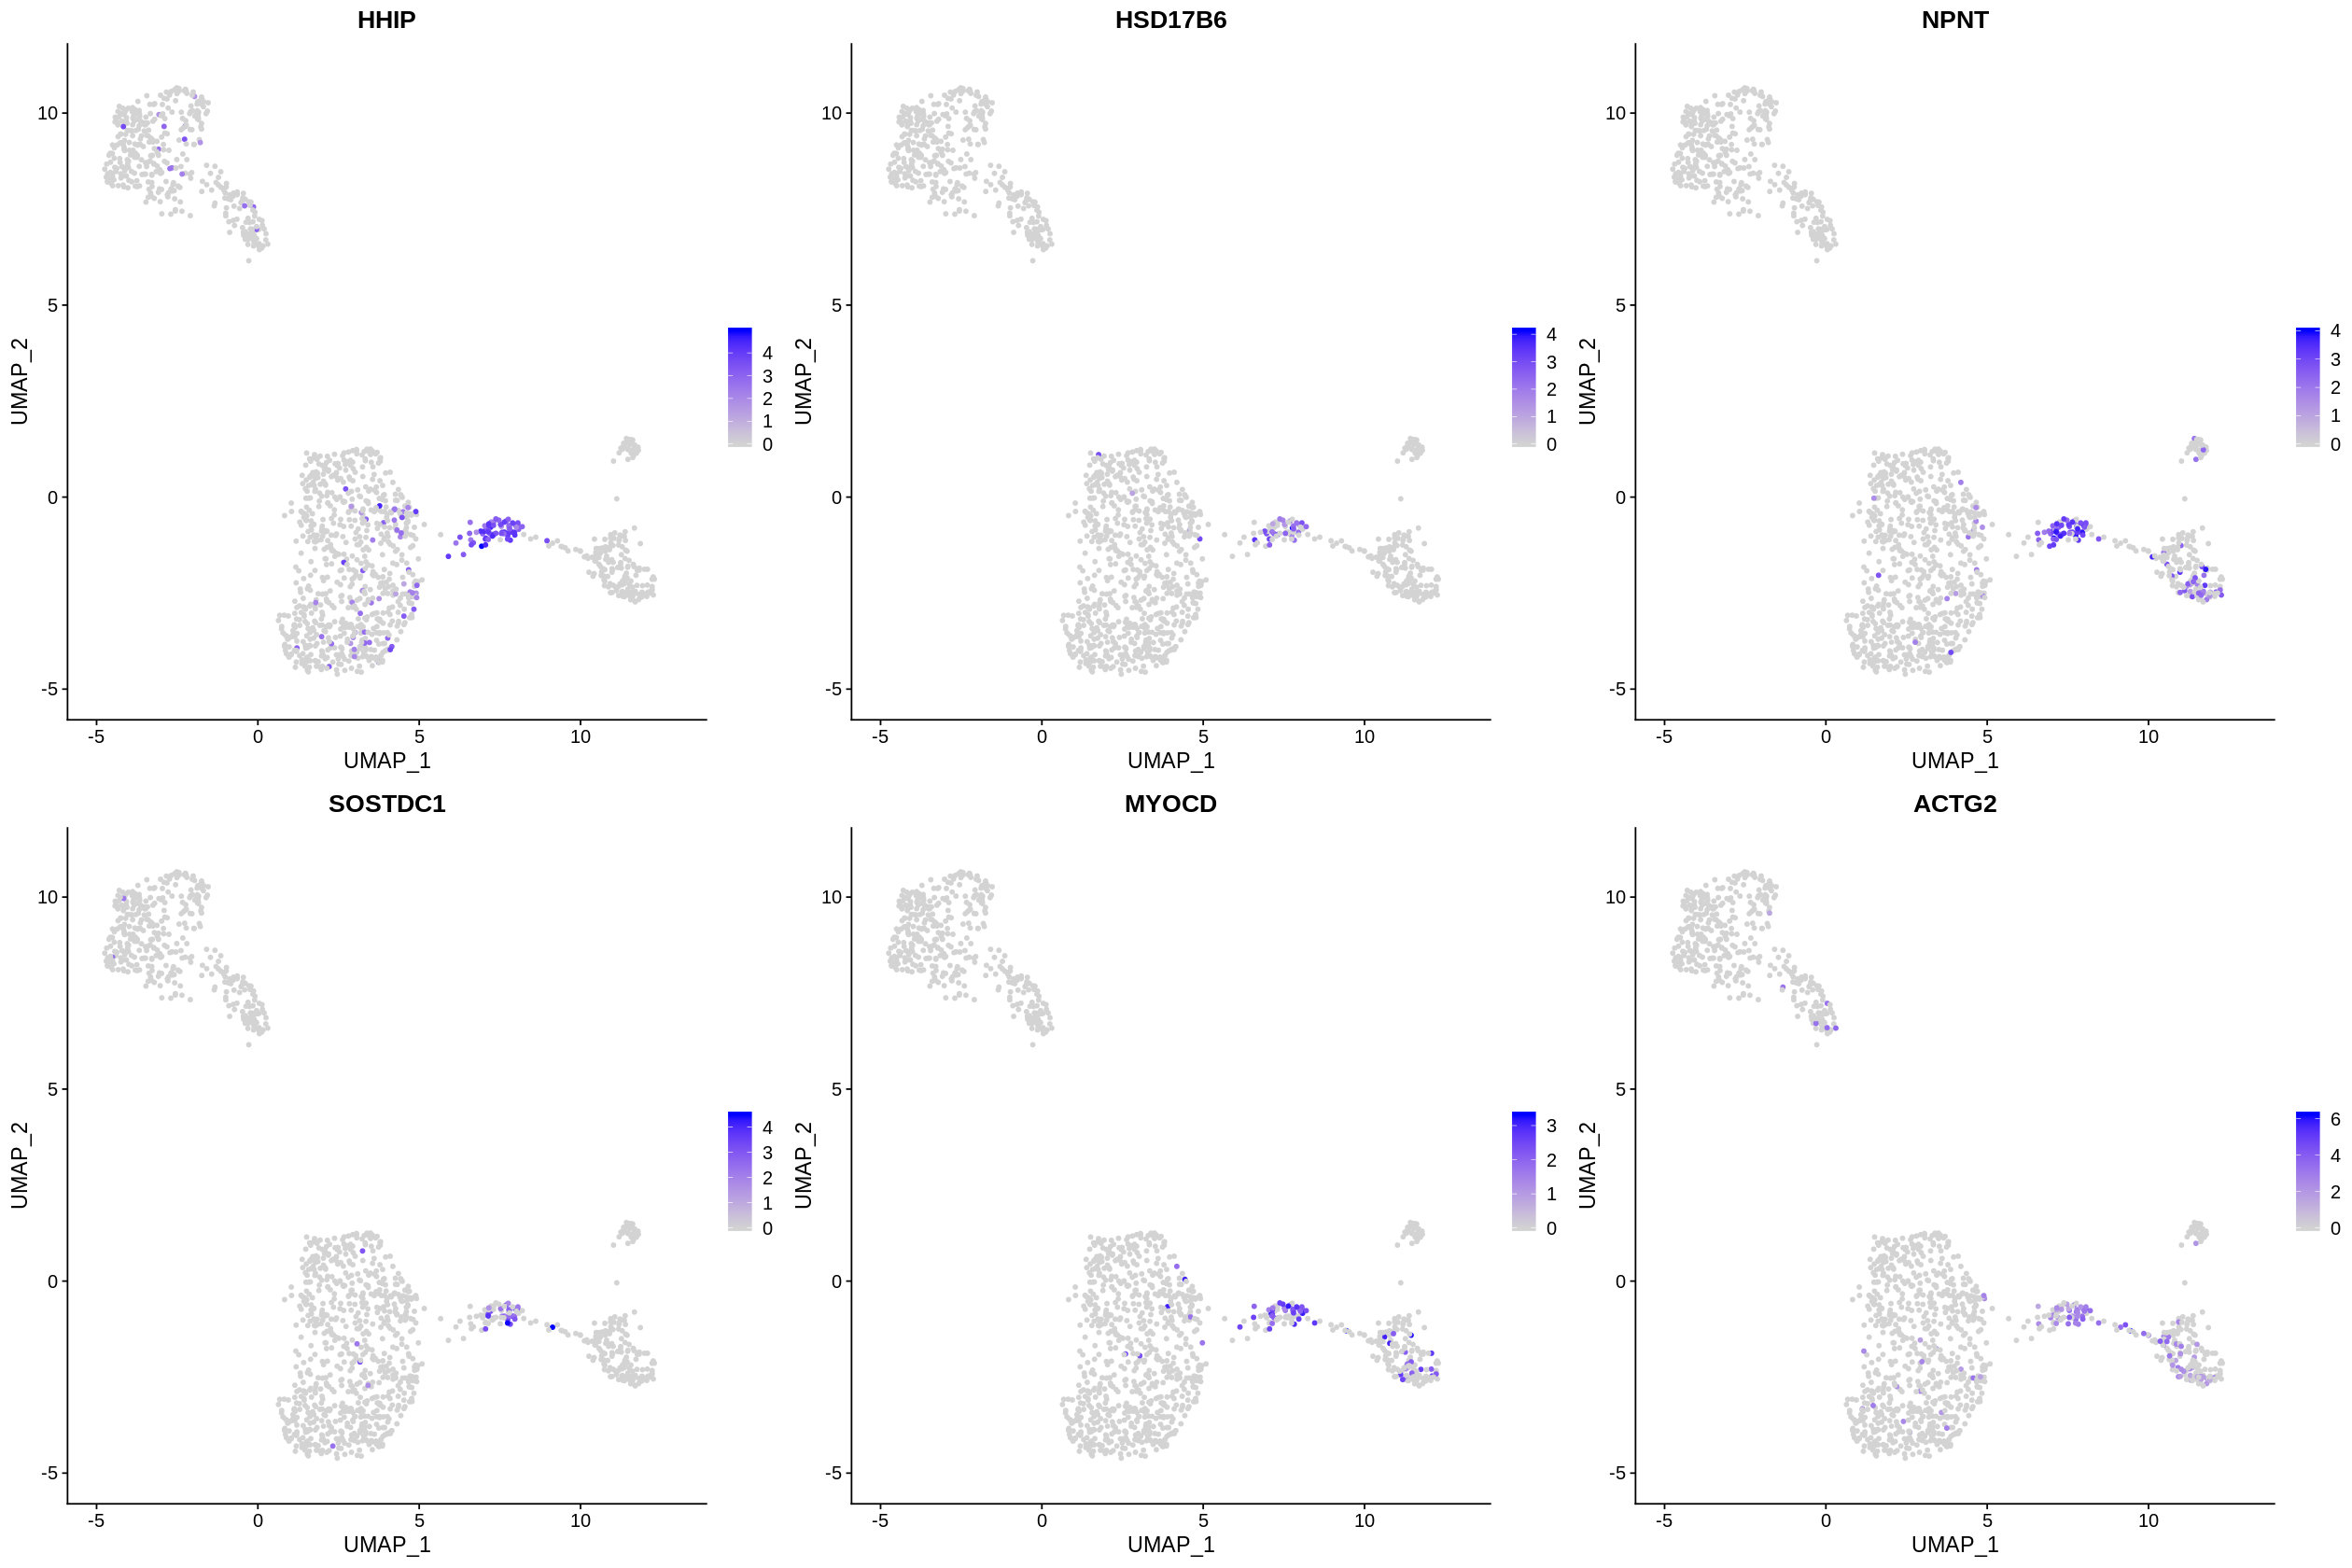

In [81]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=marker7,ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

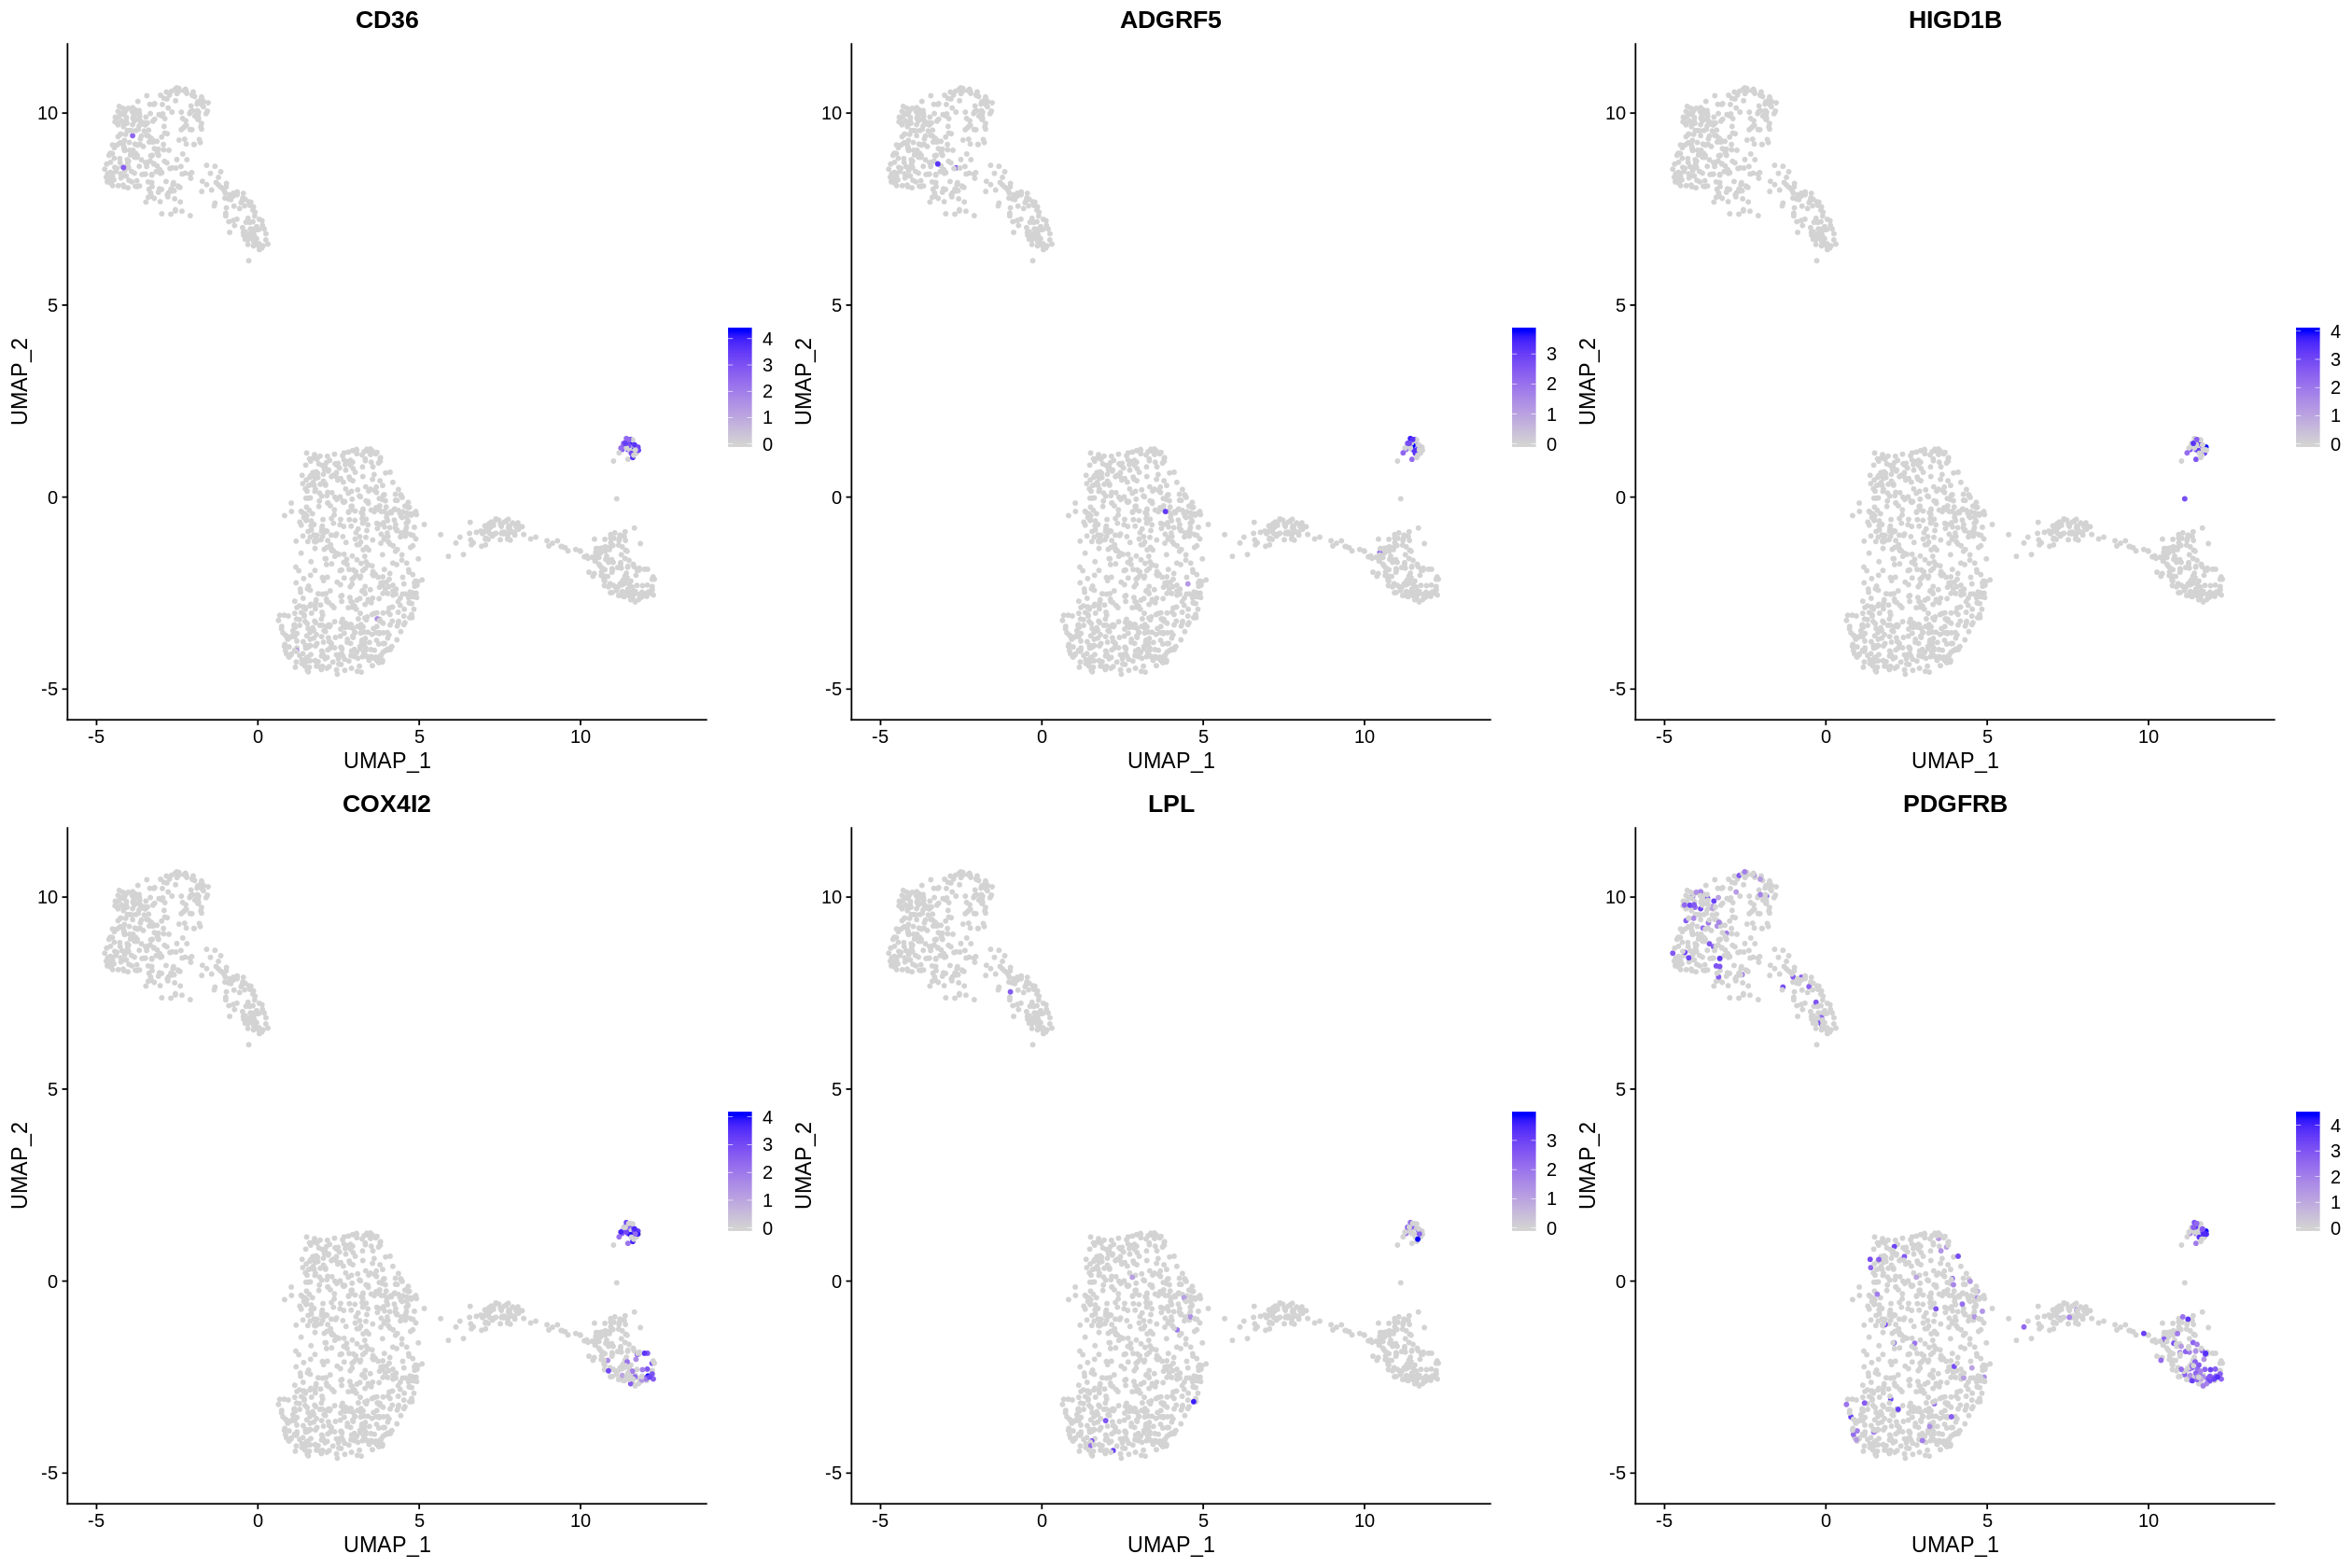

In [87]:
options(repr.plot.width=7*3, repr.plot.height=7*2)
FeaturePlot(fibro,features=c(marker8,'PDGFRB'),ncol=3)
options(repr.plot.width=7, repr.plot.height=7)

In [90]:
marker36_5 <- FindMarkers(fibro, ident.1 = c(3,6), ident.2=5, only.pos=TRUE)

In [91]:
marker36_5

p_val        avg_logFC pct.1 pct.2 p_val_adj   
CFD       7.890971e-39 2.6308906 0.943 0.255 2.646474e-34
GSN       8.020047e-38 3.0163802 0.890 0.102 2.689763e-33
FBLN1     4.352251e-34 1.9243747 0.954 0.327 1.459658e-29
TNXB      1.480297e-32 3.2307248 0.783 0.020 4.964621e-28
PLAC9     2.723606e-31 2.2032311 0.858 0.143 9.134430e-27
CCDC80    3.627478e-28 1.7334464 0.904 0.286 1.216584e-23
PI16      5.617708e-22 2.8267737 0.612 0.020 1.884067e-17
ADH1B     7.676801e-21 1.8635566 0.690 0.092 2.574646e-16
CLU       8.979321e-20 1.7810479 0.726 0.153 3.011485e-15
IGFBP6    1.705818e-19 1.6408716 0.804 0.388 5.720972e-15
SLPI      1.882838e-19 2.7804409 0.569 0.020 6.314662e-15
DCN       2.655037e-19 0.8465448 0.972 0.765 8.904464e-15
LTBP4     1.393672e-18 1.6725961 0.633 0.071 4.674097e-14
GPX3      3.363999e-18 2.4639817 0.544 0.031 1.128218e-13
OLFML3    5.955350e-18 1.8460928 0.626 0.082 1.997305e-13
SFRP1     3.283944e-17 1.8323237 0.623 0.102 1.101369e-12
NR2F1     8.062003e-16 2.0878792 0.530 0.051 2.703834e-11
SCARA5    1.135081e-14 1.8558830 0.452 0.010 3.806833e-10
C1R       1.282441e-14 1.4272253 0.616 0.133 4.301052e-10
OGN       2.253669e-14 1.1196769 0.676 0.163 7.558355e-10
FBLN2     3.001722e-14 1.8013494 0.509 0.061 1.006718e-09
ITM2A     3.824418e-14 1.5411257 0.530 0.071 1.282633e-09
PSAP      1.235394e-13 1.4879115 0.601 0.163 4.143264e-09
CYBRD1    2.930452e-13 1.0029976 0.698 0.204 9.828150e-09
COL6A2    3.389807e-13 0.9034015 0.794 0.388 1.136874e-08
CRIP1     5.247473e-13 2.6196019 0.431 0.031 1.759897e-08
JUND      5.857851e-13 1.6685299 0.484 0.051 1.964606e-08
COL14A1   1.695801e-12 1.3251017 0.577 0.143 5.687376e-08
GPNMB     1.841324e-12 1.1208437 0.658 0.194 6.175434e-08
MYADM     3.823987e-12 1.2955517 0.530 0.102 1.282489e-07
⋮         ⋮            ⋮         ⋮     ⋮     ⋮           
ADM       0.06652831   0.3230338 0.132 0.061 1           
CREBRF    0.06730228   0.3031591 0.117 0.051 1           
SUMO3     0.06821053   0.5556080 0.114 0.051 1           
NSA2      0.06862772   0.3550444 0.103 0.041 1           
DHX15     0.06896135   0.2801442 0.103 0.041 1           
RTF1      0.06944512   0.4084441 0.157 0.082 1           
RRP15     0.07237145   0.2562701 0.103 0.041 1           
SRRM2     0.07306521   0.4354441 0.114 0.051 1           
NBL1      0.07377322   0.3307015 0.210 0.122 1           
PRKAA1    0.08013971   0.3166895 0.128 0.061 1           
WDR83OS   0.08196460   0.3437379 0.114 0.051 1           
C8orf59   0.08561191   0.4717109 0.125 0.061 1           
MIR4458HG 0.08894397   0.3803610 0.110 0.051 1           
ZBTB7A    0.08966530   0.3204058 0.125 0.061 1           
THRAP3    0.09033633   0.3391705 0.110 0.051 1           
NDUFS4    0.09232422   0.3471394 0.125 0.061 1           
FSTL1     0.09371768   0.2834312 0.722 0.602 1           
MT1X      0.09645459   0.4646814 0.160 0.092 1           
TOP1      0.10197363   0.4100647 0.107 0.051 1           
C11orf96  0.11643962   0.3611241 0.246 0.163 1           
RAB14     0.12645231   0.3338946 0.117 0.061 1           
PLA2G2A   0.13807344   0.2525065 0.178 0.112 1           
C5orf24   0.15300524   0.2571761 0.114 0.061 1           
OAT       0.16119416   0.3366524 0.171 0.112 1           
PTPN12    0.16323351   0.3454058 0.135 0.082 1           
NAMPT     0.18811121   0.4782750 0.217 0.153 1           
PCNP      0.21709644   0.2776659 0.132 0.082 1           
GADD45B   0.28348867   0.2635037 0.125 0.082 1           
VMP1      0.28623721   0.2757062 0.274 0.214 1           
PTGDS     0.28634422   0.5598291 0.192 0.143 1

In [92]:
marker12 <- FindMarkers(fibro, ident.1 = 1, ident.2=2, only.pos=TRUE)

In [96]:
marker12 %>% head

p_val        avg_logFC pct.1 pct.2 p_val_adj   
ABCA8  1.434306e-43 1.5378933 0.875 0.216 4.810375e-39
ADAM28 3.541671e-31 1.4573528 0.623 0.091 1.187806e-26
LUM    5.616285e-31 0.9295826 0.942 0.373 1.883590e-26
PLPP3  2.309581e-29 1.1820024 0.747 0.191 7.745874e-25
CFD    7.508016e-22 0.6680431 0.630 0.162 2.518039e-17
COL5A2 1.296674e-21 0.8408757 0.720 0.220 4.348785e-17

In [97]:
marker21 <- FindMarkers(fibro, ident.1 =2 , ident.2=1, only.pos=TRUE)

In [99]:
marker21 %>% head

p_val        avg_logFC pct.1 pct.2 p_val_adj   
F3     1.708400e-10 1.5010956 0.469 0.280 5.729631e-06
IGKC   3.684545e-08 1.8444372 0.195 0.039 1.235723e-03
VSTM2A 5.278393e-07 1.4964412 0.104 0.004 1.770268e-02
JCHAIN 3.098001e-06 1.3553358 0.187 0.054 1.039007e-01
IGFBP5 3.300941e-06 0.8529845 0.552 0.420 1.107069e-01
IGHA1  1.012886e-05 1.6306173 0.183 0.058 3.397017e-01

In [100]:
marker02 <- FindMarkers(fibro, ident.1 =0 , ident.2=2, only.pos=TRUE)

In [102]:
marker02 %>% head(20)

p_val        avg_logFC pct.1 pct.2 p_val_adj   
POSTN  2.942481e-22 0.7486591 0.954 0.656 9.868492e-18
TRPA1  2.090871e-21 0.6788531 0.745 0.220 7.012363e-17
NRG1   4.750387e-20 1.2686006 0.498 0.095 1.593185e-15
MFGE8  7.908291e-20 1.0170435 0.448 0.066 2.652283e-15
PLAT   5.264056e-19 0.5975740 0.768 0.261 1.765459e-14
F3     2.986010e-18 0.6359682 0.919 0.469 1.001448e-13
CXCL14 2.500008e-17 0.7325496 0.896 0.556 8.384528e-13
COL6A3 3.187805e-16 0.6171703 0.699 0.241 1.069126e-11
GJA1   1.066965e-15 0.9588979 0.398 0.071 3.578389e-11
PDGFRA 1.256011e-15 0.5469749 0.950 0.502 4.212409e-11
EDIL3  1.320282e-15 0.5142264 0.637 0.195 4.427962e-11
VCAN   3.642208e-15 0.4358383 0.710 0.253 1.221524e-10
WNT5A  4.303892e-15 0.8453540 0.467 0.116 1.443439e-10
MXRA5  4.579607e-15 0.7090880 0.429 0.091 1.535908e-10
EDNRB  6.290460e-15 0.4789568 0.625 0.195 2.109695e-10
COL4A5 1.763155e-14 0.5050146 0.579 0.174 5.913271e-10
IL1R1  2.145037e-14 0.5671768 0.440 0.095 7.194025e-10
LTBP1  2.589384e-14 0.6026869 0.463 0.112 8.684276e-10
AGT    1.266868e-13 0.9070367 0.290 0.033 4.248824e-09
ENHO   1.440778e-13 0.6661411 0.347 0.058 4.832082e-09

In [103]:
marker20 <- FindMarkers(fibro, ident.1 = 2, ident.2=0, only.pos=TRUE)

In [104]:
marker20

p_val        avg_logFC pct.1 pct.2 p_val_adj 
JCHAIN    6.217707e-07 0.9862061 0.187 0.046 0.02085294
IGKC      9.998461e-07 2.4368923 0.195 0.058 0.03353284
IGHA1     2.107707e-04 1.5672665 0.183 0.077 1.00000000
CRTAP     1.341527e-03 0.3727980 0.104 0.236 1.00000000
CCDC80    1.353620e-03 0.2969220 0.104 0.232 1.00000000
TMSB4X    1.582523e-03 0.4531544 0.668 0.753 1.00000000
NDUFB1    3.937645e-03 0.2786221 0.166 0.320 1.00000000
TFF1      5.048604e-03 1.2180702 0.120 0.054 1.00000000
ATP5MG    5.605936e-03 0.2719388 0.075 0.166 1.00000000
NOP56     6.994770e-03 0.3003175 0.041 0.108 1.00000000
PLEKHH2   9.007016e-03 0.3284894 0.203 0.367 1.00000000
COMMD6    9.826981e-03 0.4155807 0.129 0.247 1.00000000
ACKR3     1.028029e-02 0.2520640 0.071 0.154 1.00000000
SBF2      1.181004e-02 0.2817575 0.091 0.185 1.00000000
ARL2BP    1.188752e-02 0.3981588 0.058 0.131 1.00000000
YAF2      1.238704e-02 0.2794100 0.058 0.131 1.00000000
GPBP1L1   1.261424e-02 0.2787496 0.054 0.124 1.00000000
EPS8      1.322784e-02 0.3503914 0.087 0.178 1.00000000
JAK1      1.354052e-02 0.3000164 0.112 0.216 1.00000000
TLK1      1.545468e-02 0.2767780 0.062 0.135 1.00000000
ASAP1     1.782874e-02 0.3037861 0.062 0.131 1.00000000
KIF5B     1.888720e-02 0.2855486 0.083 0.166 1.00000000
PLAC9     2.031922e-02 0.3580172 0.199 0.355 1.00000000
PNN       2.372354e-02 0.2827072 0.058 0.124 1.00000000
MUC12     2.403088e-02 0.3882612 0.058 0.124 1.00000000
UQCRB     2.794288e-02 0.2549773 0.154 0.263 1.00000000
COPS9     2.859140e-02 0.3103475 0.079 0.151 1.00000000
WDR74     2.878538e-02 0.4093505 0.062 0.127 1.00000000
CHTOP     2.900759e-02 0.2554615 0.062 0.127 1.00000000
JUND      2.941412e-02 0.6920722 0.328 0.293 1.00000000
⋮         ⋮            ⋮         ⋮     ⋮     ⋮         
TCEA1     0.7915859    0.4978945 0.104 0.104 1         
DUSP6     0.7925716    0.4998457 0.091 0.104 1         
PHPT1     0.7940155    0.4599340 0.124 0.127 1         
ZBTB20    0.8012530    0.3223797 0.382 0.533 1         
TXNIP     0.8022484    0.3770920 0.249 0.278 1         
FTL       0.8067769    0.3872360 0.365 0.448 1         
CXCR4     0.8069516    0.6277201 0.091 0.104 1         
SELENOS   0.8147775    0.4244251 0.129 0.131 1         
SLTM      0.8304483    0.6106909 0.120 0.139 1         
ROBO1     0.8382487    0.6066135 0.091 0.104 1         
ZFP36     0.8428969    0.5025412 0.191 0.208 1         
EIF2S3    0.8535562    0.5433587 0.100 0.104 1         
ATOX1     0.8716722    0.4075153 0.108 0.124 1         
ARL6IP4   0.8817325    0.3582468 0.116 0.131 1         
CFD       0.8846079    0.9706743 0.162 0.189 1         
NPC2      0.8939342    0.5756628 0.100 0.112 1         
RSL24D1   0.8954227    0.4883311 0.145 0.166 1         
GSN       0.9022610    0.5154421 0.116 0.131 1         
GDI2      0.9023747    0.4498853 0.100 0.104 1         
MORF4L2   0.9141560    0.3653938 0.166 0.185 1         
TMEM258   0.9152398    0.5116608 0.149 0.162 1         
CAPZA1    0.9287570    0.3014350 0.129 0.143 1         
TPI1      0.9329694    0.5051293 0.112 0.120 1         
EGR1      0.9354344    0.3806454 0.282 0.317 1         
HNRNPA2B1 0.9380946    0.3122094 0.249 0.290 1         
EIF3G     0.9499854    0.5042758 0.104 0.116 1         
NSA2      0.9534129    0.5880597 0.149 0.174 1         
CSDE1     0.9554910    0.5893795 0.124 0.139 1         
ROMO1     0.9728740    0.4215628 0.129 0.139 1         
FN1       0.9741256    0.4249501 0.129 0.139 1

In [206]:
types <- c('\nsubepithelial\n(capillary induce???)','subepithelial\n(???)',
          'subepithelial\n(intermediate)','COL14A1+',
           'smooth muscle cell','tissue reparing',
           'COL14A1+','myofibroblasts',
          'PDGFRB hi')

In [207]:
fibroblasts2 <- fibro

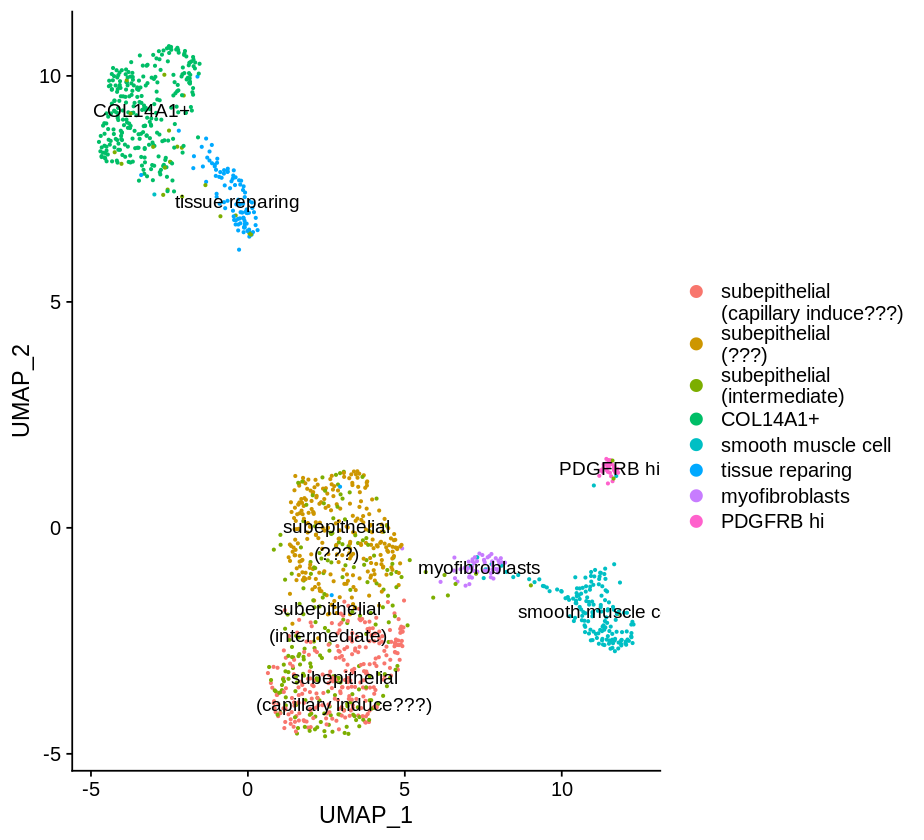

In [208]:
names(types) <- levels(fibroblasts2)
fibroblasts2 <- RenameIdents(fibroblasts2, types)
options(repr.plot.width=7*1.1, repr.plot.height=7)
DimPlot(fibroblasts2, reduction = "umap", label = TRUE, pt.size = 0.5)

### 参考文献
##### 全体に関して
1. T Xie et al. Single-Cell Deconvolution of Fibroblast Heterogeneity in Mouse Pulmonary Fibrosis. 2018, Cell Reports 22, 3625–3640. March 27, 2018
2. Gascrad P et al. Carcinoma-associated fibroblasts: orchestrating the composition of malignancy. Genes Dev. 2016 May 1;30(9):1002-19. doi: 10.1101/gad.279737.116.

##### cluster 0,2
3. POSTN: https://en.wikipedia.org/wiki/Periostin
4. PLAT: https://en.wikipedia.org/wiki/Tissue_plasminogen_activator
5. PDGFRA: Horikawa, S. et al. PDGFRα plays a crucial role in connective tissue remodeling. Sci. Rep. 5, 17948; doi: 10.1038/srep17948 (2015).
6. NRG1: ???
7. VSTM2A: Secco et al., 2017, Cell Reports18, 93–106January 3, 2017. Amplification of Adipogenic Commitment by VSTM2A.

##### cluster 1
8. ABCA8: cholesterol???
9. ADAM28: Gérard C, Hubeau C, Carnet O, et al. Microenvironment-derived ADAM28 prevents cancer dissemination. Oncotarget. 2018;9(98):37185–37199. Published 2018 Dec 14. doi:10.18632/oncotarget.26449
10. PLPP3: Zhang, X., Zhang, L., Lin, B. et al. Phospholipid Phosphatase 4 promotes proliferation and tumorigenesis, and activates Ca2+-permeable Cationic Channel in lung carcinoma cells. Mol Cancer 16, 147 (2017) doi:10.1186/s12943-017-0717-5

##### cluster 5
11. CTRCT: Lee, J., Song, J., Kwon, E. et al. CTHRC1 promotes angiogenesis by recruiting Tie2-expressing monocytes to pancreatic tumors. Exp Mol Med 48, e261 (2016) doi:10.1038/emm.2016.87
12. GREM1: https://en.wikipedia.org/wiki/Gremlin_(protein)

##### cluster 6
13. MFAP5: Chen, Z., Yan, X., Li, K. et al. Stromal fibroblast-derived MFAP5 promotes the invasion and migration of breast cancer cells via Notch1/slug signaling. Clin Transl Oncol (2019).  https://doi.org/10.1007/s12094-019-02156-1
14. PCOLE2: ??? 

In [209]:
type1 <- Idents(fibroblasts2)

In [210]:
fibroblasts2[[]] %>% head

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCTGCAAGTTAAG_1_1_1_1_1 10N-total   785        515         0         
AAACGGGAGAAGGTGA_1_1_1_1_1 10N-total  1904       1056         0         
AAAGATGGTCGGCACT_1_1_1_1_1 10N-total   798        571         0         
AAATGCCCACCAGCAC_1_1_1_1_1 10N-total  2254       1161         0         
AAATGCCCACGGCCAT_1_1_1_1_1 10N-total   919        684         0         
AACACGTAGGACGAAA_1_1_1_1_1 10N-total   539        405         0         
                           ident                RNA_snn_res.0.8 seurat_clusters
AAACCTGCAAGTTAAG_1_1_1_1_1 SingleCellExperiment 0               0              
AAACGGGAGAAGGTGA_1_1_1_1_1 SingleCellExperiment 1               1              
AAAGATGGTCGGCACT_1_1_1_1_1 SingleCellExperiment 0               0              
AAATGCCCACCAGCAC_1_1_1_1_1 SingleCellExperiment 0               0              
AAATGCCCACGGCCAT_1_1_1_1_1 SingleCellExperiment 0               0              
AACACGTAGGACGAAA_1_1_1_1_1 SingleCellExperiment 3               3

In [212]:
fibroblasts2 <- AddMetaData(
    object=fibroblasts2,
    metadata=type1,
    col.name='cell_type')

barplot(table(fibro[[]]$orig.ident),las=2,xlab = ' ',main = 'The number of fibroblasts')

In [359]:
# 命名したclusterでプロット後、各サンプルごとに各クラスターを集計する関数
# data=seurat.object(clusterプロット直後)
# types=cluster名(重複可)
cluster_count_function <- function(data,types){ 
    samplename <- c(unique(data[[]]$orig.ident))
    types2 <- unique(types)
    
    data <- AddMetaData(
    object=data,
    metadata=Idents(data),
    col.name='cell_type')
    
    # 入れ物用意
    values <- rep(0,length(samplename))
    names(values) <- samplename
    values <- t(as.data.frame(values))
    
    # countする
    for(i in 1:length(types2)){
    cr <- c()
        for(j in 1:length(samplename)){
            cr <- c(cr,dim(data[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
                %>%select(orig.ident))[1])
        }
    values <- rbind(values,cr)
    }
    rownames(values) <- c('emp',types2)
    cluster_count <- values[-1,]
    return(cluster_count)
    }

In [291]:
samplename <- c(unique(fibroblasts2[[]]$orig.ident))

In [324]:
types2 <- unique(types)

In [346]:
values <- rep(0,length(samplename))
names(values) <- samplename
values <- t(as.data.frame(values))

In [347]:
values

10N-total 11N-total 12N-total 14N-total 15N-total 16N-total 17N-total
values 0         0         0         0         0         0         0        
       6N-total 8N-total 9N-total
values 0        0        0

In [348]:
for(i in 1:length(types2)){
    cr <- c()
for(j in 1:length(samplename)){
    cr <- c(cr,dim(fibroblasts2[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
            %>%select(orig.ident))[1])
    }
    values <- rbind(values,cr)
}

In [351]:
rownames(values) <- c('emp',types2)

In [354]:
cluster_count <- values[-1,]

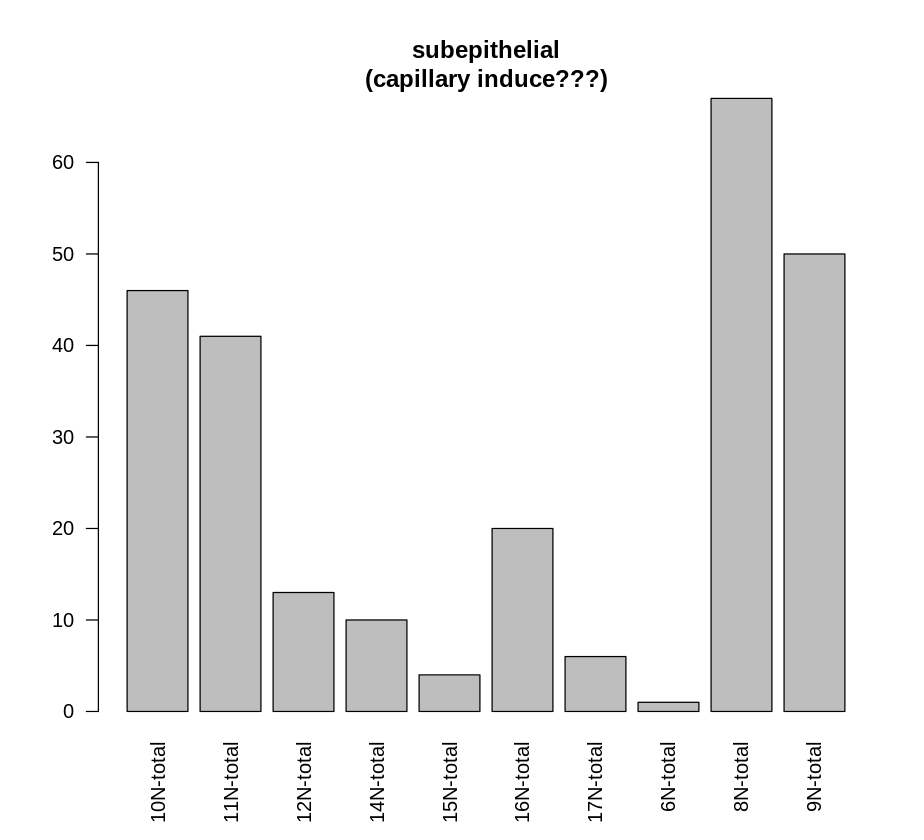

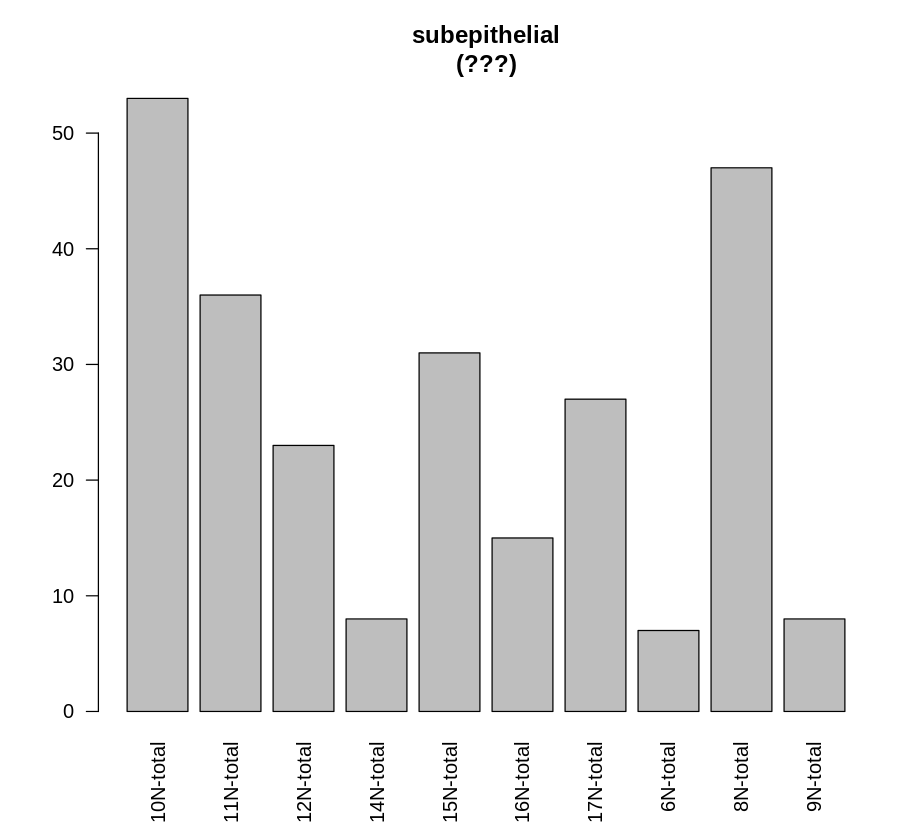

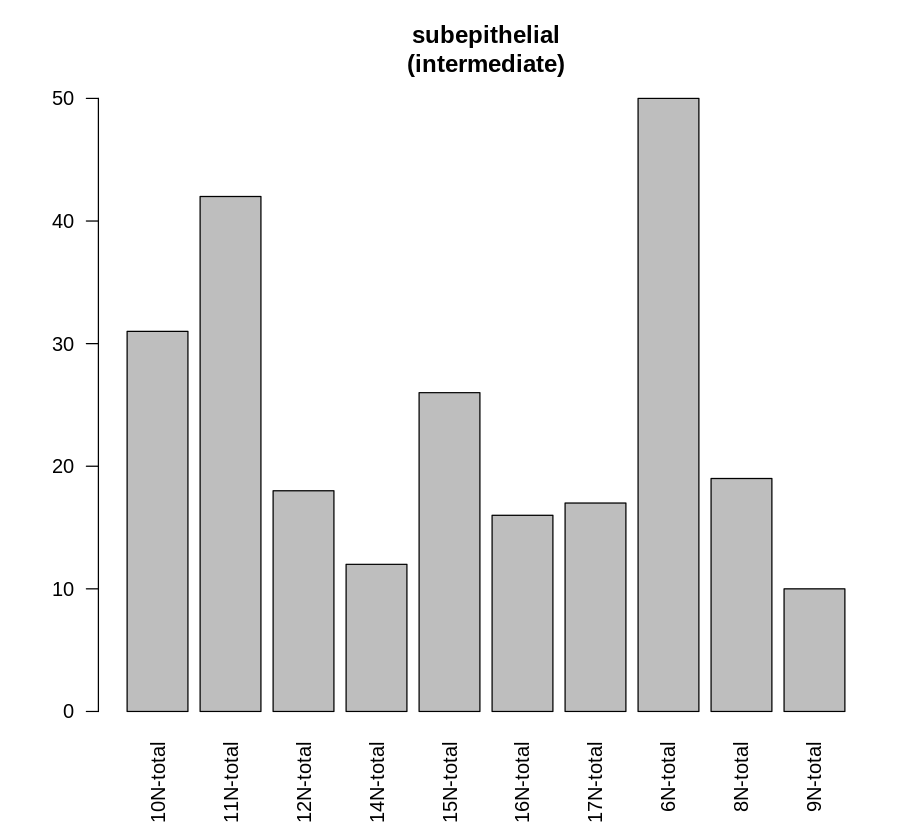

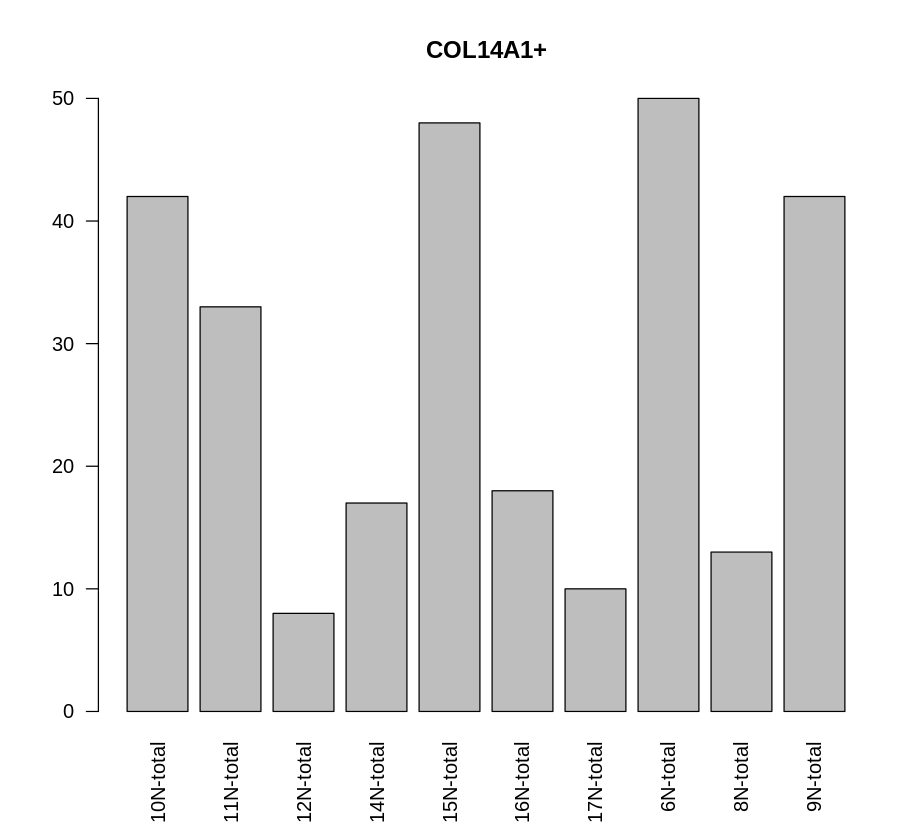

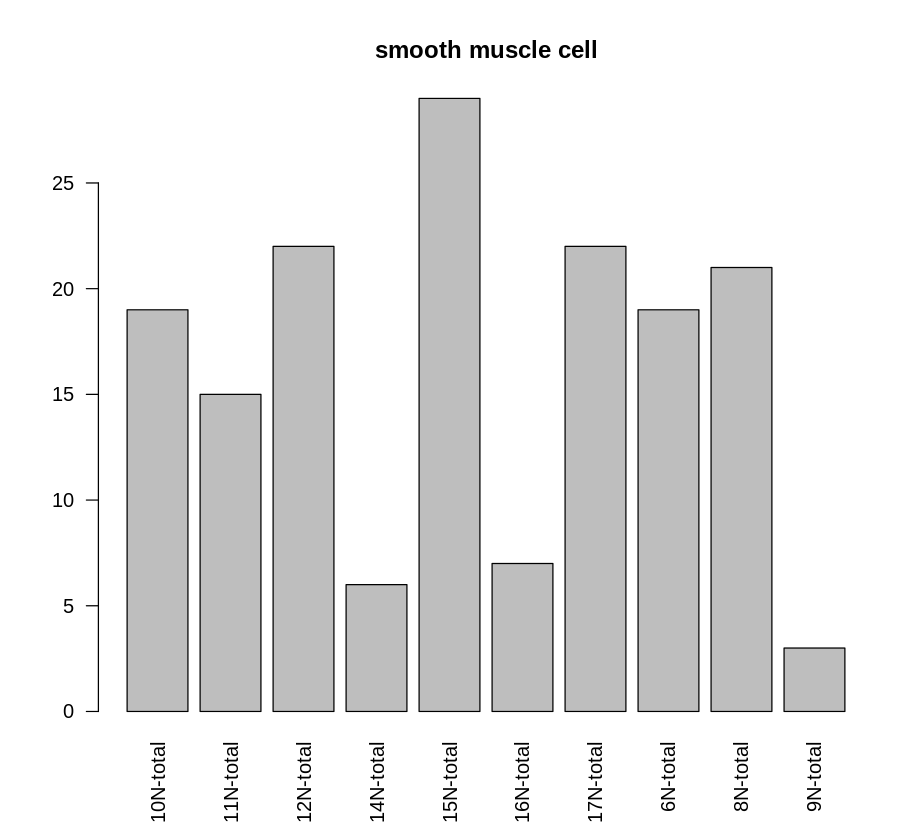

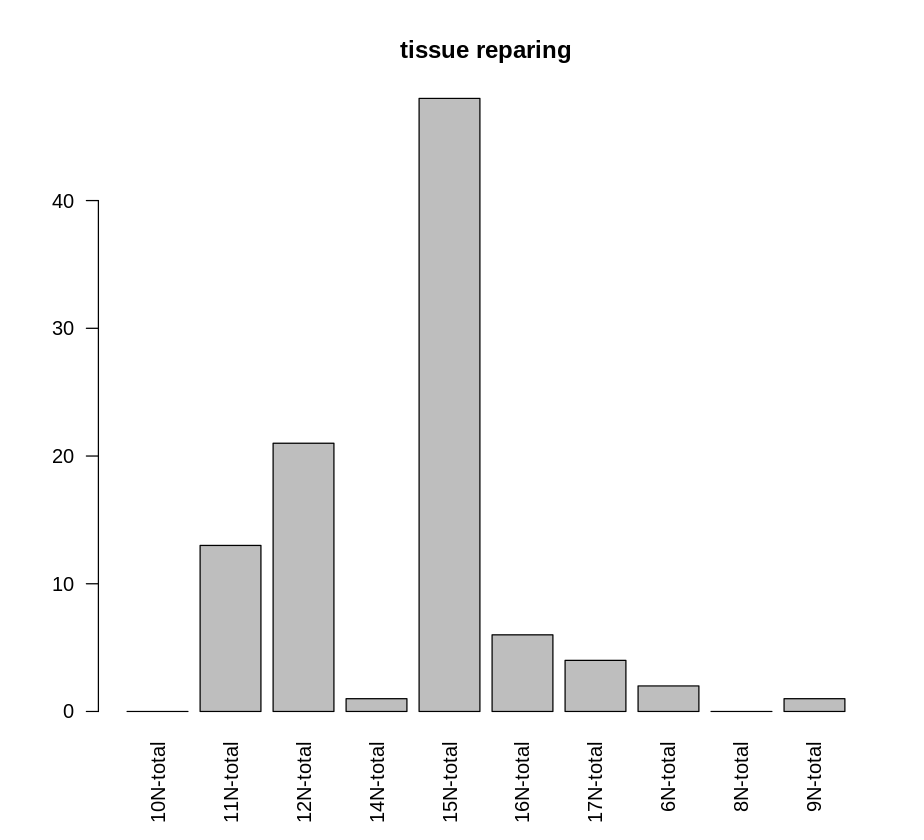

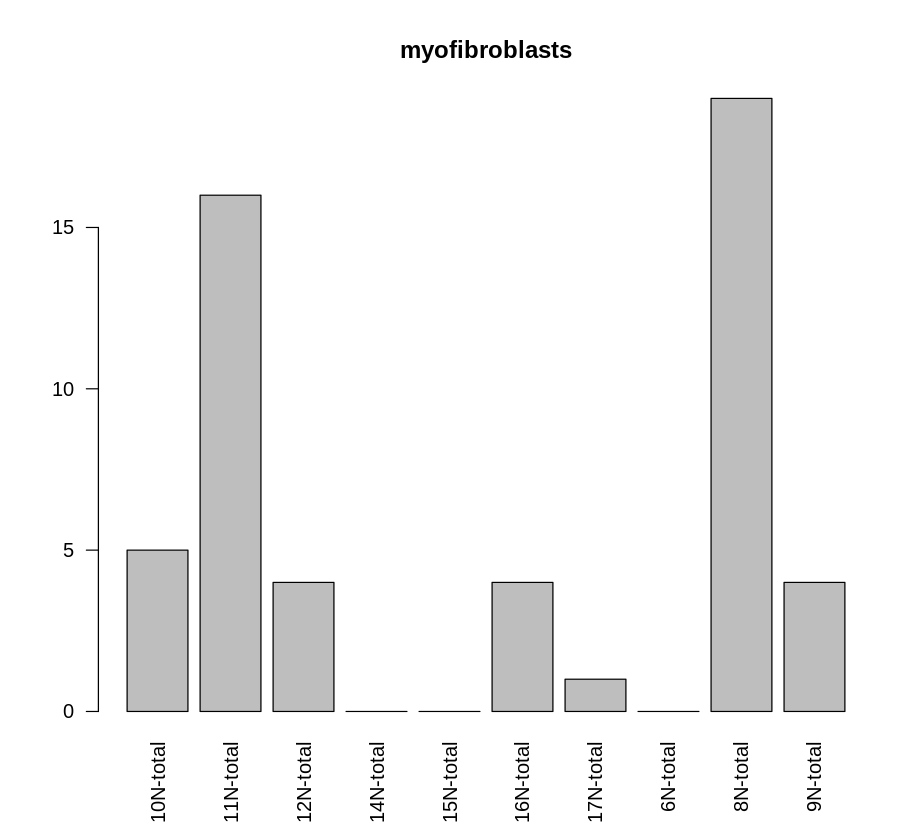

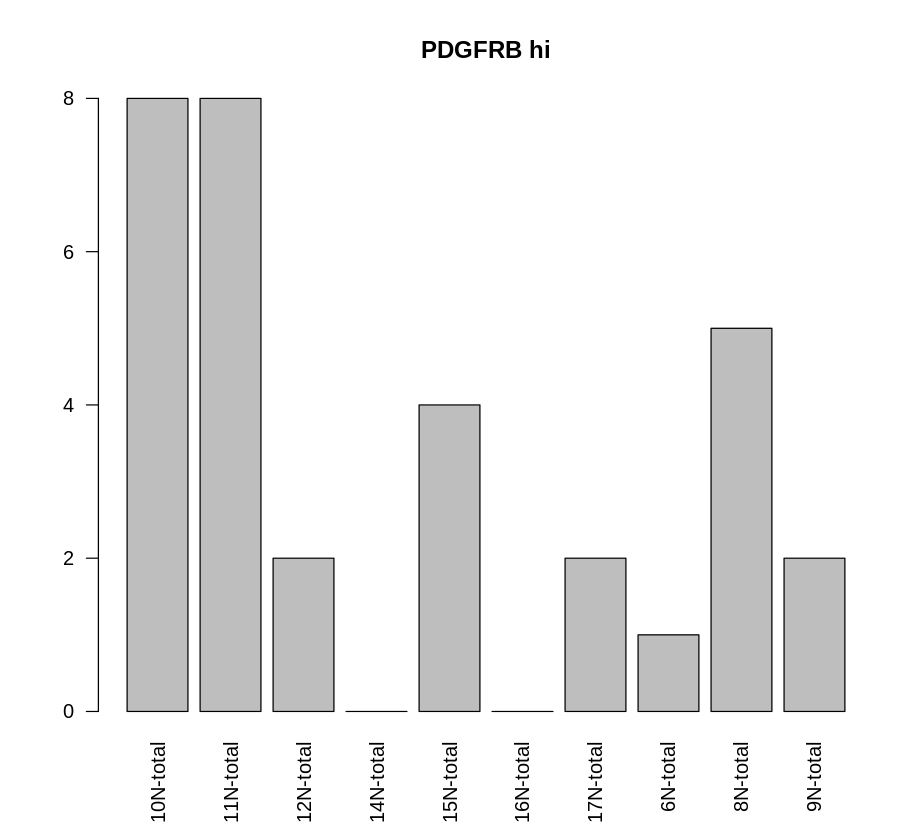

In [358]:
for (i in 1:8){
    barplot(cluster_count[i,],las=2,main = types2[i])
}

In [363]:
cluster_count

10N-total 11N-total 12N-total 14N-total
\nsubepithelial\n(capillary induce???) 46        41        13        10       
subepithelial\n(???)                   53        36        23         8       
subepithelial\n(intermediate)          31        42        18        12       
COL14A1+                               42        33         8        17       
smooth muscle cell                     19        15        22         6       
tissue reparing                         0        13        21         1       
myofibroblasts                          5        16         4         0       
PDGFRB hi                               8         8         2         0       
                                       15N-total 16N-total 17N-total 6N-total
\nsubepithelial\n(capillary induce???)  4        20         6         1      
subepithelial\n(???)                   31        15        27         7      
subepithelial\n(intermediate)          26        16        17        50      
COL14A1+                               48        18        10        50      
smooth muscle cell                     29         7        22        19      
tissue reparing                        48         6         4         2      
myofibroblasts                          0         4         1         0      
PDGFRB hi                               4         0         2         1      
                                       8N-total 9N-total
\nsubepithelial\n(capillary induce???) 67       50      
subepithelial\n(???)                   47        8      
subepithelial\n(intermediate)          19       10      
COL14A1+                               13       42      
smooth muscle cell                     21        3      
tissue reparing                         0        1      
myofibroblasts                         19        4      
PDGFRB hi                               5        2

In [371]:
table(fibro[[]]$orig.ident)


10N-total 11N-total 12N-total 14N-total 15N-total 16N-total 17N-total  6N-total 
      204       204       111        54       190        86        89       130 
 8N-total  9N-total 
      191       120 

In [372]:
table(all[[]]$orig.ident)


10N-total 11N-total 12N-total 14N-total 15N-total 16N-total 17N-total  6N-total 
     2194      1131      2836       839      1938      2113      3307       851 
 8N-total  9N-total 
     2648      1772 

In [369]:
cluster_count[1,]/table(fibro[[]]$orig.ident)*table(all[[]]$orig.ident)


 10N-total  11N-total  12N-total  14N-total  15N-total  16N-total  17N-total 
494.725490 227.308824 332.144144 155.370370  40.800000 491.395349 222.943820 
  6N-total   8N-total   9N-total 
  6.546154 928.879581 738.333333 

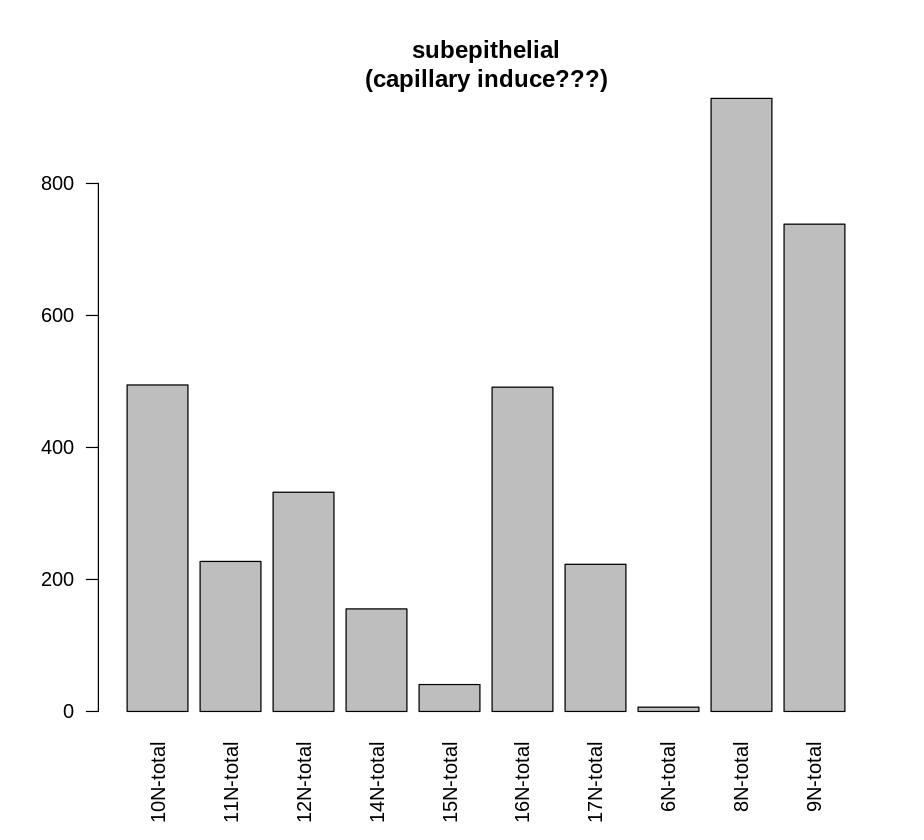

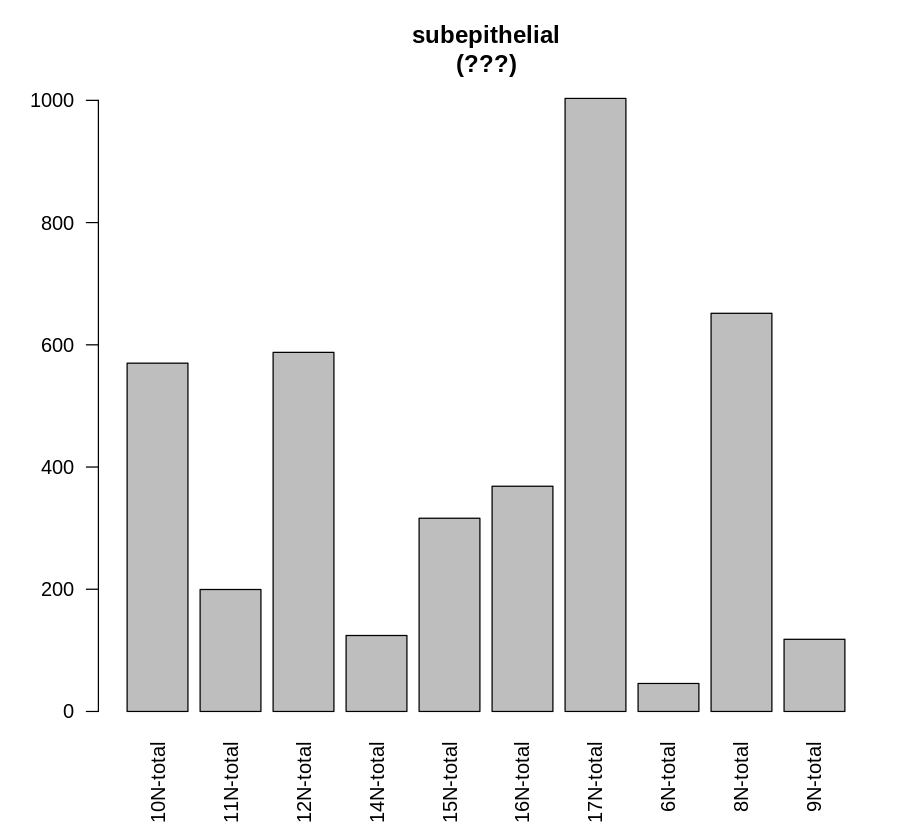

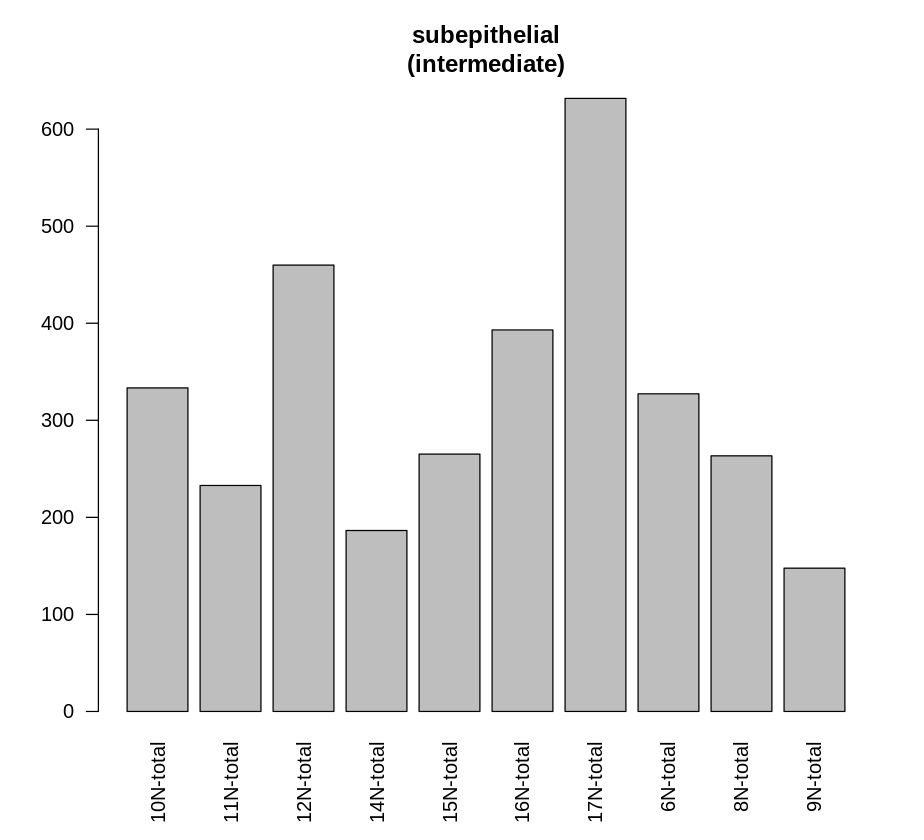

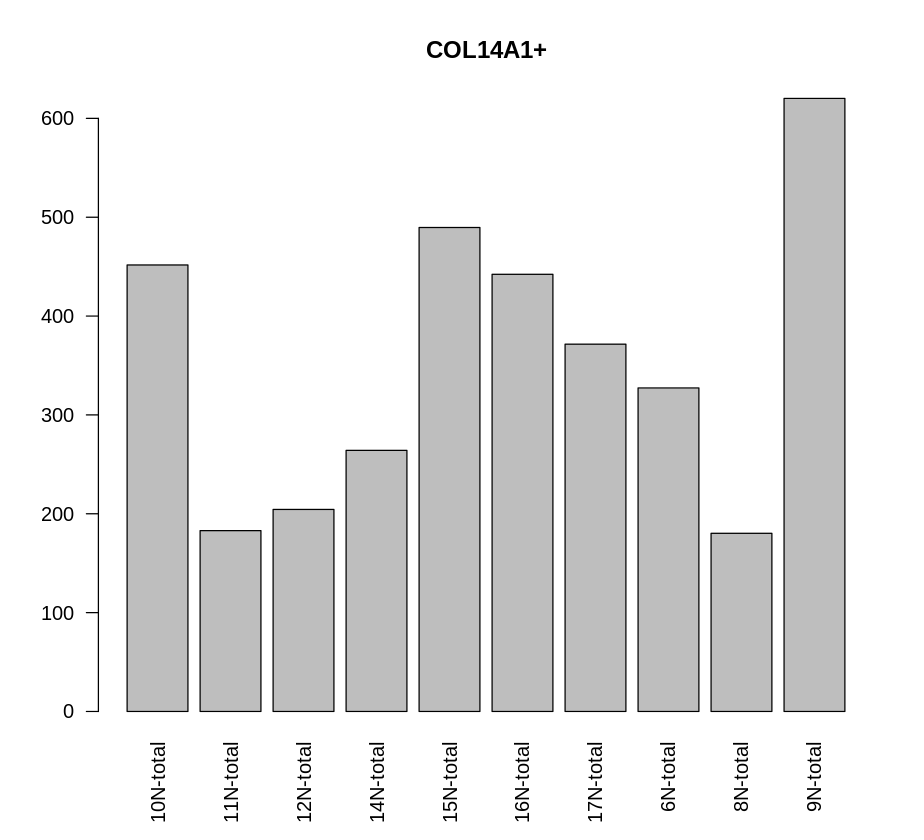

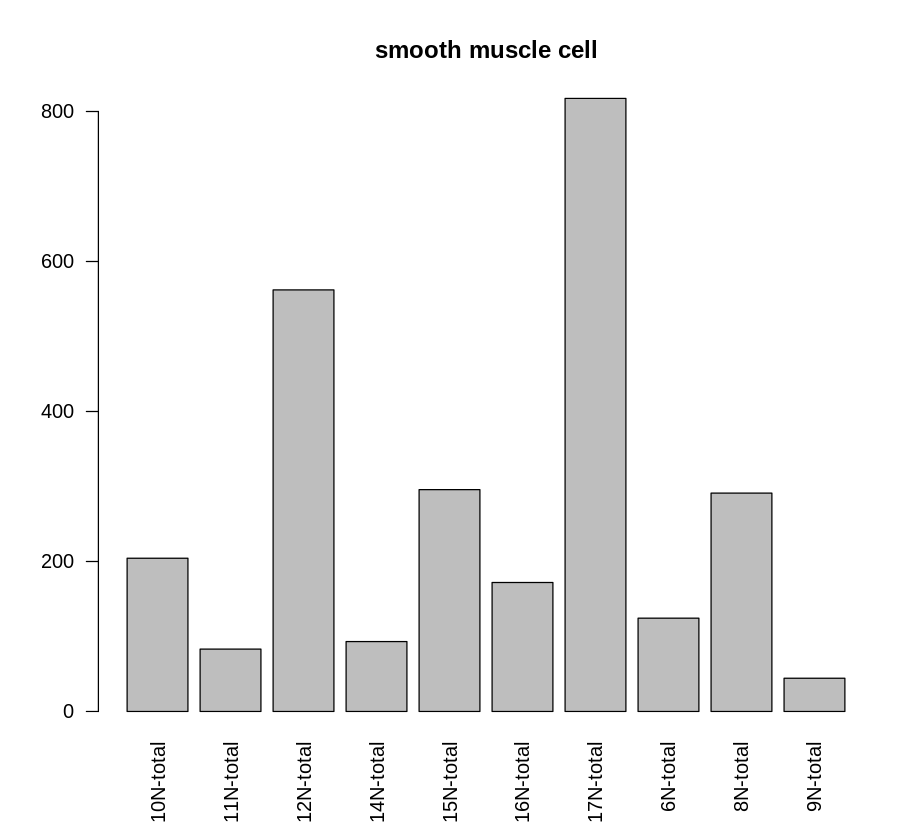

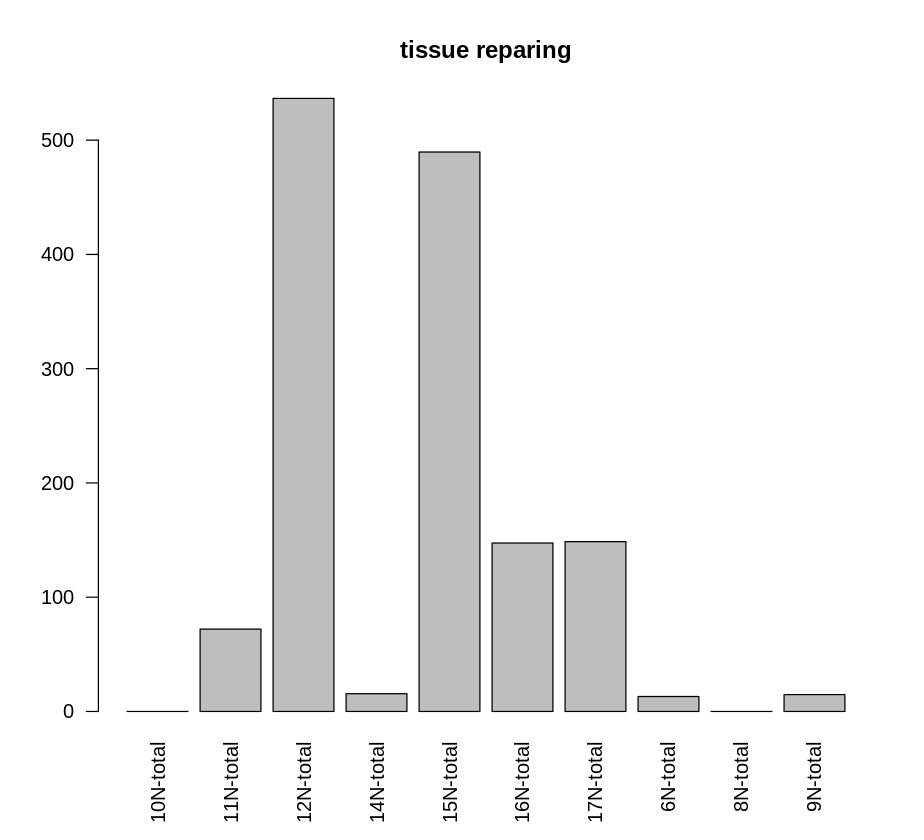

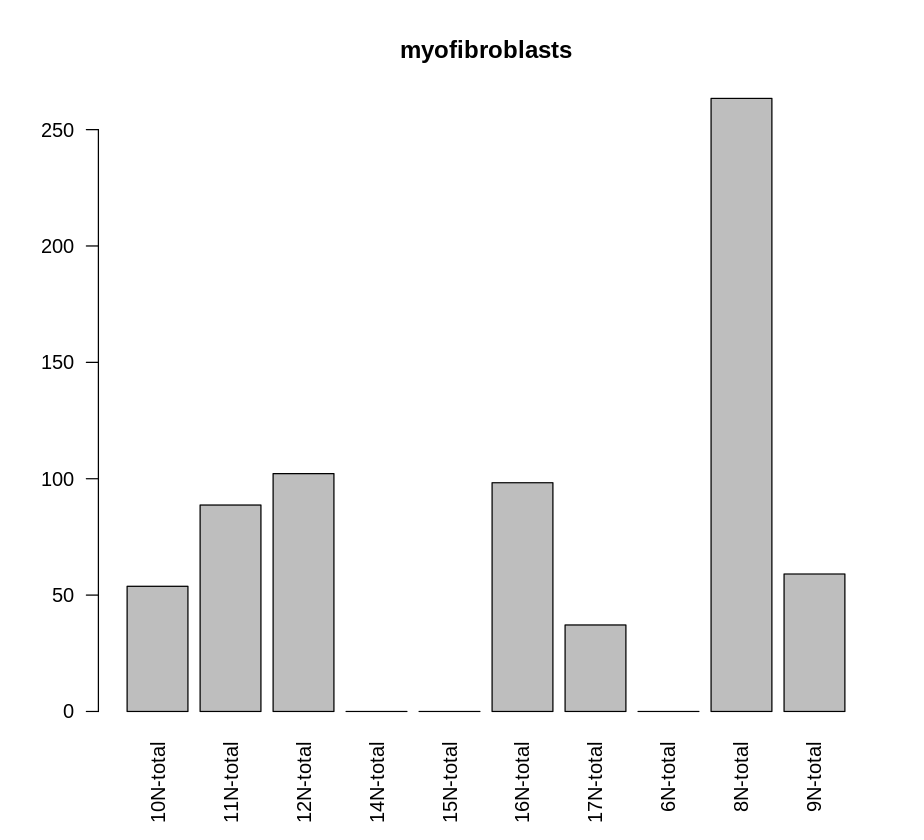

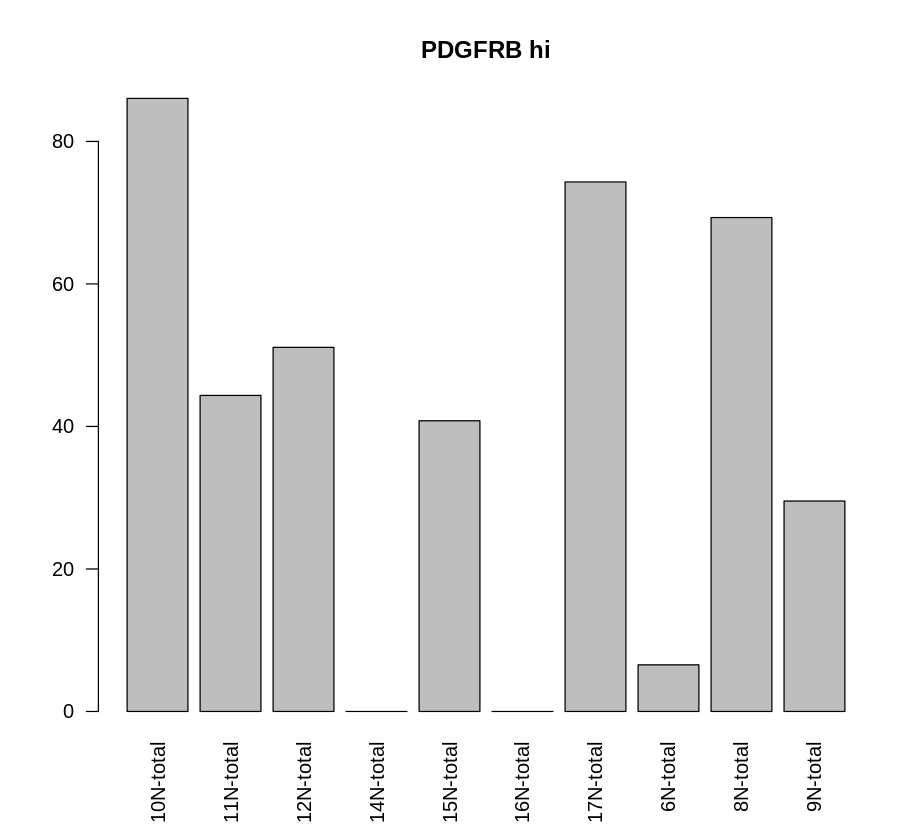

In [373]:
for(i in 1:length(types2)){
    barplot(cluster_count[i,]/table(fibro[[]]$orig.ident)*table(all[[]]$orig.ident),las=2,main=types2[i])
}